<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<h1><center><font size=8>Artificial Intelligence and Machine Learning</center></font></h1>
<h1><center>Classification using Decision Tree</center></h1>

<center><a href="https://olympus.mygreatlearning.com/dashboard" target="_blank">
  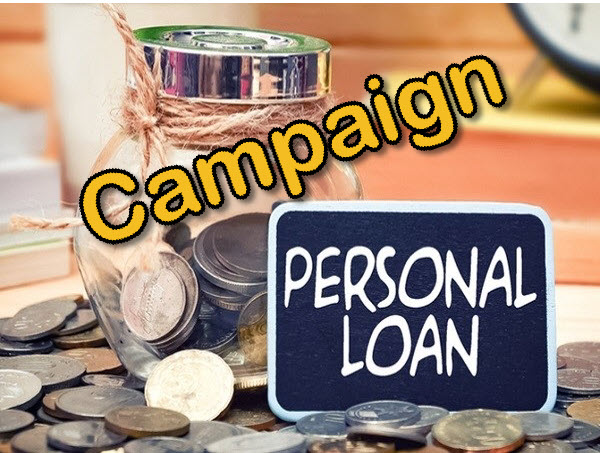
  </a>
</center>

<b><h1><center>Project Personal Loan Campaign</center></h1></b>
<b><h2><center>By Dario H. Romero</center></h2></b>

### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are `liability customers` (depositors) with varying sizes of deposits. The number of customers who are also `asset customers` (borrowers) is quite small, and the bank is interested in expanding this base rapidly __**to bring in more loan business and in the process, earn more through the interest on loans**__. In particular, the __management wants to explore ways of converting its liability customers to personal loan customers__ (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective
1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

### Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?


### Steps to Follow in the Personal Loan Campaign Modelling
* Perform an Exploratory Data Analysis on the data
  - Univariate analysis 
  - Bivariate analysis 
  - Use appropriate visualizations to identify the patterns and insights 
  - Any other exploratory deep dive

* Illustrate the insights based on EDA
  - Key meaningful observations on the relationship between variables

* Data Pre-processing
  - Prepare the data for analysis 
  - Missing value Treatment, 
  - Outlier Detection(treat, if needed), 
  - Feature Engineering, 
  - Prepare data for modelling and check the split

* Model building - Logistic Regression
  - Build the logistic regression model. 
  - Provide interpretations based on coefficients obtained from the logistic regression model 
  - Comment on model performance

* Model performance evaluation and improvement
  - Comment on which metric is right for model performance evaluation and why?
  - Can model performance be improved? If yes, then do it using appropriate techniques for logistic regression and comment on model performance after improvement

* Model building - Decision Tree
  - Build the model and comment on the model performance. 
  - Identify the key variables that have a strong relationship with the dependent variable 
  - Comment on model performance

* Model performance evaluation and improvement
  - Try pruning technique(s) 
  - Evaluate the model on appropriate metric 
  - Comment on model performance

* Actionable Insights & Recommendations
  - Compare decision tree and Logistic regression 
  - Conclude with the key takeaways for the marketing team 
  - what would your advice be on how to do this campaign?
  

### Import the necessary packages

In [1]:
import sys
import os

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

<IPython.core.display.Javascript object>

In [3]:
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [4]:
from uszipcode import SearchEngine, SimpleZipcode, ComprehensiveZipcode

<IPython.core.display.Javascript object>

In [5]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:80% !important; }</style>"))
display(HTML("<style>.output_result { max-width:80% !important; }</style>"))

np.set_printoptions(edgeitems=20, linewidth=100)
np.set_printoptions(suppress=True)
pd.set_option("expand_frame_repr", False)

plt.style.use("ggplot")

<IPython.core.display.Javascript object>

### Read the dataset

In [6]:
# read Loan_Modelling.csv file
data_file = "Loan_Modelling.csv"
data = pd.read_csv(data_file)
data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [7]:
# copying data to another varaible to avoid any changes to original data
loan = data.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [8]:
loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [9]:
loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [10]:
loan.shape

(5000, 14)

<IPython.core.display.Javascript object>

* The original dataset has 5000 rows and 14 columns of data

### Check the data types of the columns for the dataset.

In [11]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

**Observations -**
* Personal_Loan is the dependent variable - type integer.
* All the independent variables including ID but CCAvg (float type) are integer type. These variables however are binary (1 or 0) except for ZIPCode and CCAvg.
* Column ID will be removed from the dataset.

In [12]:
# removing column ID from the dataset
loan.drop(axis=1, columns=["ID"], inplace=True)

<IPython.core.display.Javascript object>

### Summary of the dataset.

In [13]:
loan.describe(include="all")

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<IPython.core.display.Javascript object>

**Observations-**   

* There are observations with negative values in '`Experience`'. We will modify them to get `absolute` values instead on these cells.

### Check for missing values

In [14]:
loan.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing vaues in the dataset

### Univariate analysis

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.2f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


def histogram_boxplot(data, feature, figsize=(16, 8), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

## Observations on Personal_Loan

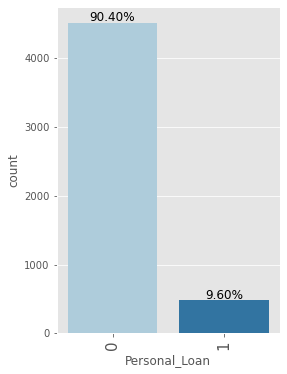

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(loan, "Personal_Loan", perc=True)

* 90.4% of the customers have not applied for a loan yet.

## Observations on Age

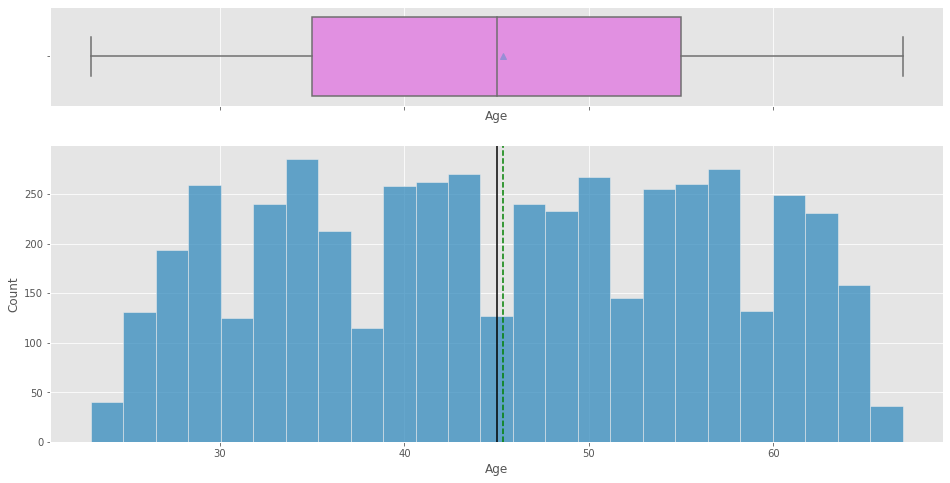

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(loan, "Age", bins=25)

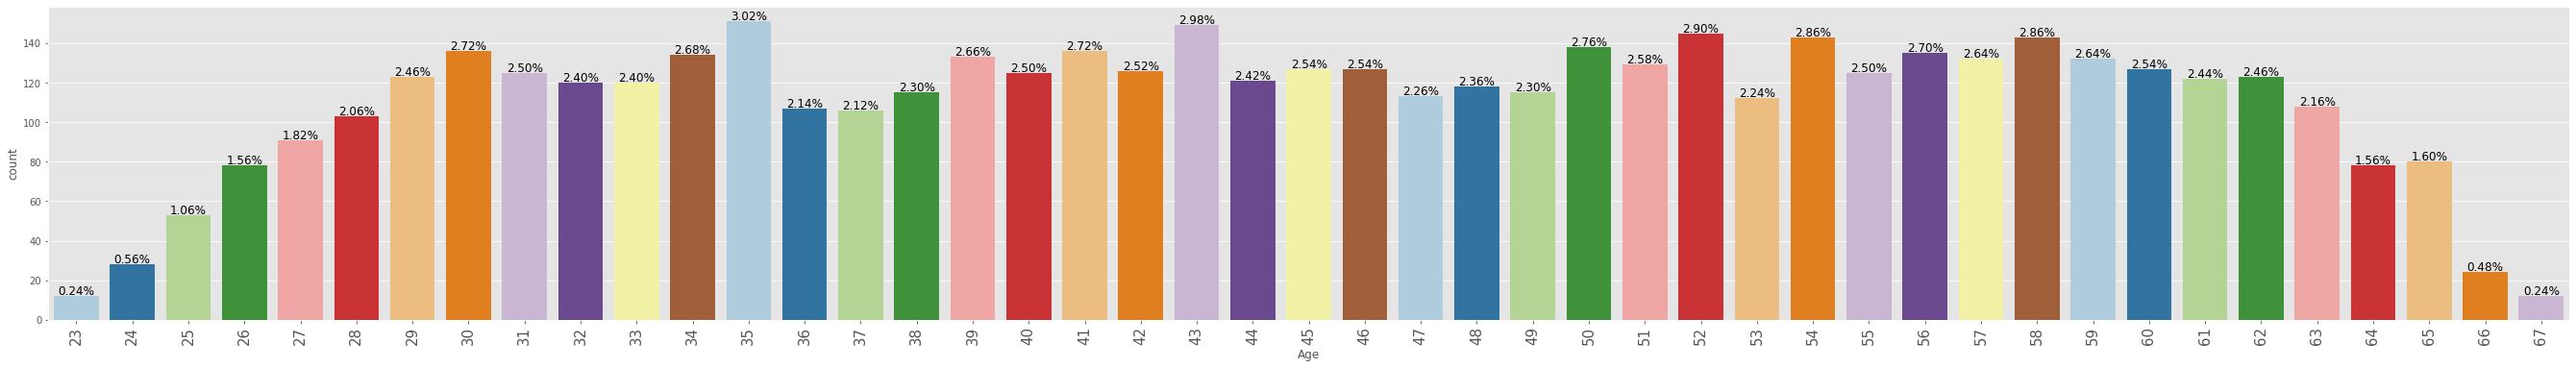

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(loan, "Age", perc=True)

* Ages are all distributed from 23-yrs old to 67-yrs old.
* Tails of the distribution are on the younger and older segments.
* Ages 35, 43, 53, 54, and 58 are the most populated segments with more than 140 people in each.

#### We will do stratifications on the `Age` column by categorizing it using the groups: `Young Adults` {17 .. 30}; `Middle-Aged Adults`: {31 .. 45}; `Old-Aged Adults`: {46 .. 60}; `Senior-Aged Adults`: {61 .. beyond}

In [19]:
loan["Age_bins"] = pd.cut(
    loan.Age,
    bins=[17, 30, 45, 60, 75],
    labels=[
        "Young Adults",
        "Middle-Aged Adults",
        "Old-Aged Adults",
        "Senior-Aged Adults",
    ],
)

<IPython.core.display.Javascript object>

In [20]:
loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Young Adults
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Middle-Aged Adults
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Middle-Aged Adults
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,Middle-Aged Adults
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Middle-Aged Adults


<IPython.core.display.Javascript object>

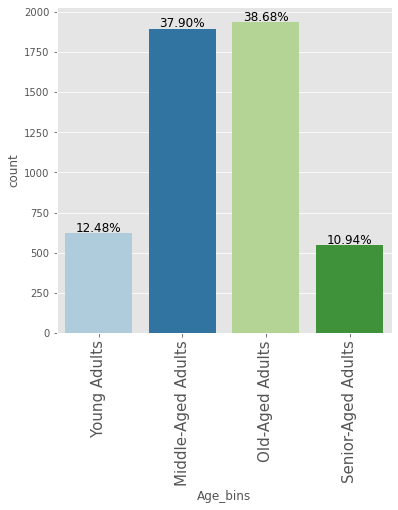

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(loan, "Age_bins", perc=True)

## Observations on Experience

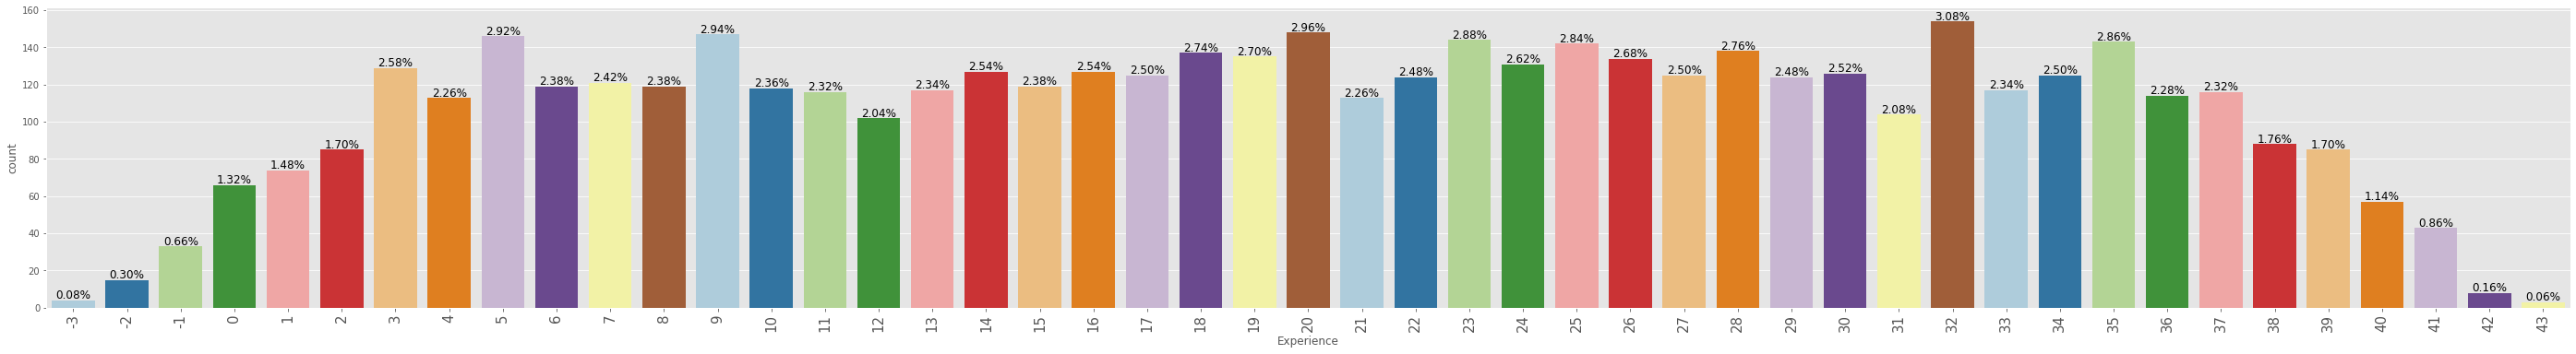

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(loan, "Experience", perc=True)

* On the far right we have customers with a max of 43 yrs of experience. That number is reasonable and will not be treated differently.

* on the very left we have customers with `negative` experience. Not a reasonable value and we will using the `absolute` value of the `Experience` to fix this.

In [23]:
# changing negative experience to absolute values
loan[loan["Experience"] < 0].shape

(52, 14)

<IPython.core.display.Javascript object>

* There are 52 customers with `negative` experience.

In [24]:
# applying lambda function to fix the negative values
loan["Experience"] = loan["Experience"].apply(lambda x: abs(x) if x < 0 else x)

<IPython.core.display.Javascript object>

#### We will do similar stratifications on the `Experience` column by categorizing it using the groups: `Entry` {0 .. 9}; `Intermediate`: {9 .. 19}; `Advanced`: {19 .. 29}; `Expert`: {29 .. 45}**

In [25]:
loan["Experience_bins"] = pd.cut(
    loan.Experience,
    bins=[-1, 9, 19, 29, 45],
    labels=["Entry", "Intermediate", "Advanced", "Expert"],
)

<IPython.core.display.Javascript object>

In [26]:
loan.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,Young Adults,Entry
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,Middle-Aged Adults,Intermediate
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,Middle-Aged Adults,Intermediate
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,Middle-Aged Adults,Entry
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,Middle-Aged Adults,Entry


<IPython.core.display.Javascript object>

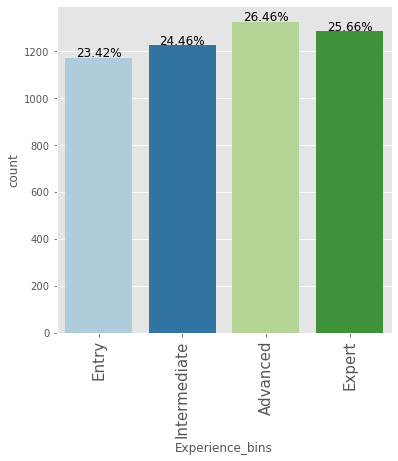

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(loan, "Experience_bins", perc=True)

* We obtained a pretty good __homogeneous__ distribution of the `Experience` level.

Note: Removing `Age` and `Experience`. Working only with the statified versions of them: `Age_bins` , and `Experience_bins`.

In [28]:
loan.drop(axis=1, columns=["Age", "Experience"], inplace=True)

<IPython.core.display.Javascript object>

In [29]:
loan

,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins
0,49,91107,4,1.6,1,0,0,1,0,0,0,Young Adults,Entry
1,34,90089,3,1.5,1,0,0,1,0,0,0,Middle-Aged Adults,Intermediate
2,11,94720,1,1.0,1,0,0,0,0,0,0,Middle-Aged Adults,Intermediate
3,100,94112,1,2.7,2,0,0,0,0,0,0,Middle-Aged Adults,Entry
4,45,91330,4,1.0,2,0,0,0,0,0,1,Middle-Aged Adults,Entry
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,92697,1,1.9,3,0,0,0,0,1,0,Young Adults,Entry
4996,15,92037,4,0.4,1,85,0,0,0,1,0,Young Adults,Entry
4997,24,93023,2,0.3,3,0,0,0,0,0,0,Senior-Aged Adults,Expert
4998,49,90034,3,0.5,2,0,0,0,0,1,0,Senior-Aged Adults,Expert


<IPython.core.display.Javascript object>

## Observations on Income

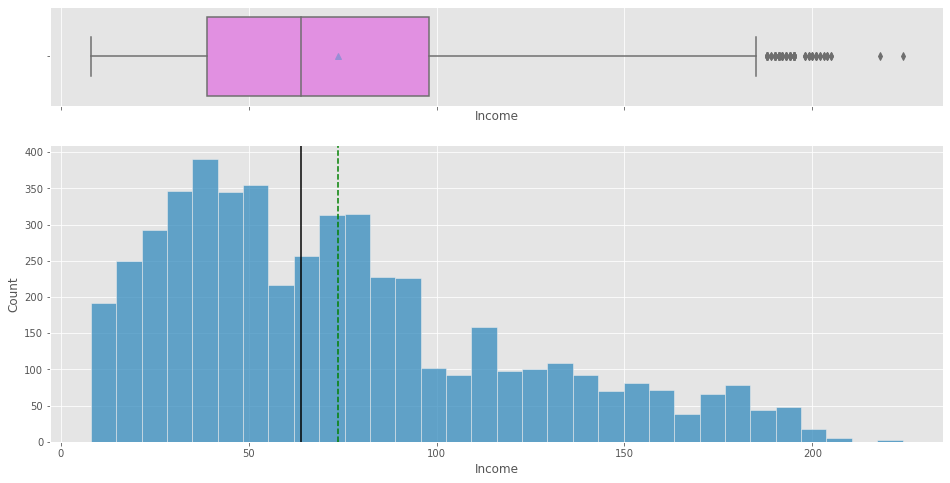

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(loan, "Income")

* The distribution on `Income` is right skewed with several outliers showing in the boxplot.

## Observations on ZIPCode

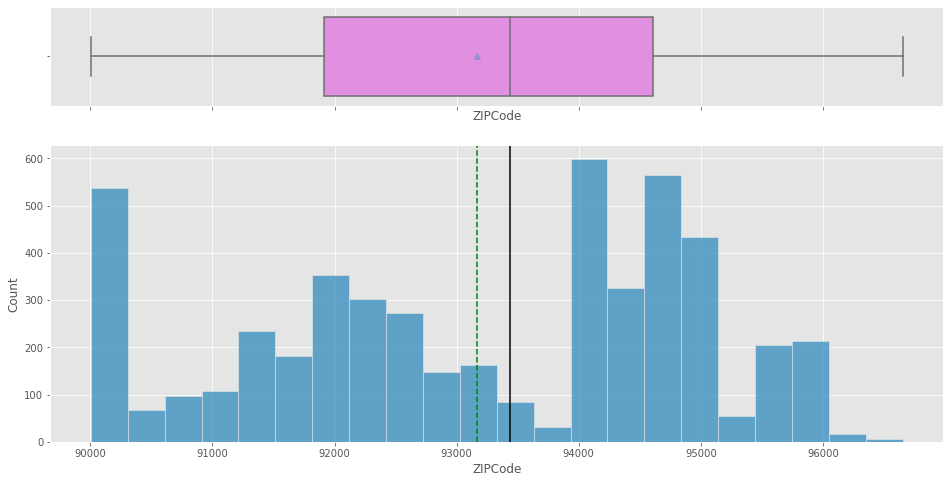

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(loan, "ZIPCode")

* Let's review if we have some invalid ZIP Codes by utilizing the package `uszipcode`

In [32]:
# instantiate the search engine for the ZIP Code library
engine = SearchEngine(
    simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive
)
# initialize a list to receive the invalid ZIP Codes
invalid_zip_codes = []
# loop through the ZIP Codes
for zipcode in loan["ZIPCode"].unique():
    try:
        ezipcode = engine.by_zipcode(zipcode)
        # need to pull some data to force the exception
        median_home_value = (
            np.nan
            if ezipcode.median_home_value is None
            else float(ezipcode.median_home_value) / 1000.0
        )
    except:
        invalid_zip_codes.append(zipcode)

del engine
print(invalid_zip_codes)

[92717, 93077, 92634, 96651]


<IPython.core.display.Javascript object>

* There are 4 `invalid` ZIP Codes.

In [33]:
# listing how many observations have an `invalid` zip code
loan[loan["ZIPCode"].isin(invalid_zip_codes)].shape[0]

34

<IPython.core.display.Javascript object>

* There are 34 observations with invalid `ZIP Codes` which we will be removing from the dataset.

In [34]:
# removing rows with invalid ZIP Codes.
indices_to_remove = loan[loan["ZIPCode"].isin(invalid_zip_codes)].index
loan.drop(axis=0, index=indices_to_remove, inplace=True)

<IPython.core.display.Javascript object>

In [35]:
# instantiate the search engine for the ZIP Code library
engine = SearchEngine(
    simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive
)

# loop through the ZIP Codes to extract `Major City`
for zipcode in loan["ZIPCode"].unique():
    try:
        ezipcode = engine.by_zipcode(zipcode)
        # need to pull some data to force the exception
        major_city = ezipcode.major_city
        loan.loc[loan["ZIPCode"] == zipcode, "Major City"] = major_city
    except:
        print("Invalid ZIP Code")

<IPython.core.display.Javascript object>

In [36]:
loan

,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,Major City
0,49,91107,4,1.6,1,0,0,1,0,0,0,Young Adults,Entry,Pasadena
1,34,90089,3,1.5,1,0,0,1,0,0,0,Middle-Aged Adults,Intermediate,Los Angeles
2,11,94720,1,1.0,1,0,0,0,0,0,0,Middle-Aged Adults,Intermediate,Berkeley
3,100,94112,1,2.7,2,0,0,0,0,0,0,Middle-Aged Adults,Entry,San Francisco
4,45,91330,4,1.0,2,0,0,0,0,0,1,Middle-Aged Adults,Entry,Northridge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,92697,1,1.9,3,0,0,0,0,1,0,Young Adults,Entry,Irvine
4996,15,92037,4,0.4,1,85,0,0,0,1,0,Young Adults,Entry,La Jolla
4997,24,93023,2,0.3,3,0,0,0,0,0,0,Senior-Aged Adults,Expert,Ojai
4998,49,90034,3,0.5,2,0,0,0,0,1,0,Senior-Aged Adults,Expert,Los Angeles


<IPython.core.display.Javascript object>

In [37]:
# instantiate the search engine for the ZIP Code library
engine = SearchEngine(
    simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive
)

# loop through the ZIP Codes to extract `Median Household Income`
for zipcode in loan["ZIPCode"].unique():
    try:
        ezipcode = engine.by_zipcode(zipcode)
        # need to pull some data to force the exception
        mhi = ezipcode.median_household_income
        loan.loc[loan["ZIPCode"] == zipcode, "MHI"] = mhi
    except:
        print("Invalid ZIPCode")

<IPython.core.display.Javascript object>

In [38]:
loan["Major City"].value_counts()[:5]

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
Name: Major City, dtype: int64

<IPython.core.display.Javascript object>

* Let's review how well grouping we get by using `Major City`

In [39]:
# sample using 'Los Angeles' as `Major City` and see how many different `ZIPCodes` we get
loan[loan["Major City"] == "Los Angeles"]["ZIPCode"].value_counts()[:10]

90095    71
90024    50
90089    46
90034    20
90025    19
90064    14
90041    10
90033     9
90049     9
90028     8
Name: ZIPCode, dtype: int64

<IPython.core.display.Javascript object>

* For the actual ZIP Code we review the documentation about the 5-digit (X-YY-ZZ) code and what they mean: `X` is `National Area` where `9` is for `California`; `YY` is the `Large City Post Office`, and `ZZ` correspond to the `Post Office Delivery Area`. All ZIP Codes in this dataset belongs to `California` as the first digit is `9` and the second pair of digits range from 0-61 inclusive which validate to `Large City Post Office` within `California`. Therefore, we will utilize the second pair of 2-digits representing `Large City Post Office` to group more data per **city post office** and have less fractioned data under that column.

* And we will name that column `City PO` for `City Post Office`.

* Deleting previous created `Major City` column using the `uszipcode` Python package. Replacing it with a major group by `City PO`.

In [40]:
loan.drop(axis=1, columns=["Major City"], inplace=True)

<IPython.core.display.Javascript object>

* Creating new column `City PO` using the second group of 2-digits of `Post Office Delivery Area`.

In [41]:
loan["City PO"] = loan["ZIPCode"].apply(lambda x: int(str(x)[1:3]))

<IPython.core.display.Javascript object>

## ZIP Code Treatment

In [42]:
loan.head()

,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI,City PO
0,49,91107,4,1.6,1,0,0,1,0,0,0,Young Adults,Entry,80936.0,11
1,34,90089,3,1.5,1,0,0,1,0,0,0,Middle-Aged Adults,Intermediate,NaN,0
2,11,94720,1,1.0,1,0,0,0,0,0,0,Middle-Aged Adults,Intermediate,NaN,47
3,100,94112,1,2.7,2,0,0,0,0,0,0,Middle-Aged Adults,Entry,71625.0,41
4,45,91330,4,1.0,2,0,0,0,0,0,1,Middle-Aged Adults,Entry,NaN,13


<IPython.core.display.Javascript object>

### Calculating the `mean` value of `'Median Household Income'` by grouping observations based on the `City PO`: `'City Post Office'`.

In [43]:
meanMHI = loan.groupby(by=["City PO"])["MHI"].apply(np.nanmean)

<IPython.core.display.Javascript object>

In [44]:
# find missing `mean` values per `City PO` of the `Median Household Income`
meanMHI.isnull().sum()

1

<IPython.core.display.Javascript object>

* We found only `1` `City Post Office` with missing `Median Household Income`.

In [45]:
# find `City PO` where `MHI` is NaN
index_val = meanMHI[meanMHI.isnull()].index.tolist()
loan[loan["City PO"].isin(index_val)]

,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI,City PO
561,41,94234,4,1.67,3,0,0,0,0,1,0,Senior-Aged Adults,Expert,NaN,42
1318,178,94234,1,1.00,1,0,0,0,0,0,0,Old-Aged Adults,Advanced,NaN,42
3517,95,94234,1,3.90,3,146,1,0,0,0,1,Young Adults,Entry,NaN,42
3677,43,94234,2,0.30,1,0,0,0,0,0,1,Old-Aged Adults,Expert,NaN,42
4022,81,94234,4,4.00,3,0,0,0,0,1,0,Middle-Aged Adults,Entry,NaN,42
4089,85,94234,4,2.10,3,0,0,0,0,1,0,Young Adults,Entry,NaN,42
4581,59,94234,1,1.50,3,0,0,0,0,0,1,Middle-Aged Adults,Intermediate,NaN,42


<IPython.core.display.Javascript object>

Searching for the `Major City` corresponding to the `City PO` = 42. We will utilize the `uszipcode` package. 

In [46]:
# instantiate the search engine for the ZIP Code library
engine = SearchEngine(
    simple_or_comprehensive=SearchEngine.SimpleOrComprehensiveArgEnum.comprehensive
)

# loop through a specific ZIP Codes
zipcode = 94234  # <- `City PO` = 42 as our `City PO` is located in the second and third position of the ZIP Code
try:
    ezipcode = engine.by_zipcode(zipcode)
    # need to pull some data to force the exception
    mhi = ezipcode.median_household_income
    mc = ezipcode.major_city
    print(f"ZIP: [{zipcode}], MHI: [{mhi}], Major City: [{mc}]")
except:
    print("Invalid ZIPCode")

ZIP: [94234], MHI: [None], Major City: [Sacramento]


<IPython.core.display.Javascript object>

* Note: The __Median Household Income__ (`MHI`) is missing for Sacramento `(City PO = 42)`. We searched the web and found the `MHI` for Sacramento is around `$62,335`. We will impute that value for the missing data in the `Major City` __Sacramento__. 

### Impute values for `Median Household Income` _**MHI**_ using the index `City PO`.

In [47]:
# imputing the value of MHI for `Sacramento`
loan.loc[loan["City PO"] == 42, "MHI"] = 62335

<IPython.core.display.Javascript object>

In [48]:
loan[loan["City PO"] == 42]

,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI,City PO
561,41,94234,4,1.67,3,0,0,0,0,1,0,Senior-Aged Adults,Expert,62335.0,42
1318,178,94234,1,1.00,1,0,0,0,0,0,0,Old-Aged Adults,Advanced,62335.0,42
3517,95,94234,1,3.90,3,146,1,0,0,0,1,Young Adults,Entry,62335.0,42
3677,43,94234,2,0.30,1,0,0,0,0,0,1,Old-Aged Adults,Expert,62335.0,42
4022,81,94234,4,4.00,3,0,0,0,0,1,0,Middle-Aged Adults,Entry,62335.0,42
4089,85,94234,4,2.10,3,0,0,0,0,1,0,Young Adults,Entry,62335.0,42
4581,59,94234,1,1.50,3,0,0,0,0,0,1,Middle-Aged Adults,Intermediate,62335.0,42


<IPython.core.display.Javascript object>

In [49]:
# update meanMHI for all cities `City PO`
meanMHI = loan.groupby(by=["City PO"])["MHI"].apply(np.nanmean)

<IPython.core.display.Javascript object>

In [50]:
# getting the mean of `Median Household Income` by `City PO` to replace where we may have NaN
meanMHI = (
    loan.groupby(by=["City PO"])["MHI"]
    .apply(np.nanmean)
    .to_frame()
    .reset_index(drop=False)
)

<IPython.core.display.Javascript object>

In [51]:
# print the head of the dataframe
loan.head()

,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI,City PO
0,49,91107,4,1.6,1,0,0,1,0,0,0,Young Adults,Entry,80936.0,11
1,34,90089,3,1.5,1,0,0,1,0,0,0,Middle-Aged Adults,Intermediate,NaN,0
2,11,94720,1,1.0,1,0,0,0,0,0,0,Middle-Aged Adults,Intermediate,NaN,47
3,100,94112,1,2.7,2,0,0,0,0,0,0,Middle-Aged Adults,Entry,71625.0,41
4,45,91330,4,1.0,2,0,0,0,0,0,1,Middle-Aged Adults,Entry,NaN,13


<IPython.core.display.Javascript object>

### Impute all missing `MHI`s per `City PO`

* Impute the `median` value of the `Median Household Income` `(MHI)` on every correspondent `City PO`

In [52]:
for row in loan.itertuples(index=None, name=None):
    _, _, _, _, _, _, _, _, _, _, _, _, _, mhi, city_po = row
    if mhi != mhi:
        replaced_value = meanMHI.loc[meanMHI["City PO"] == city_po, "MHI"].values[0]
        loan.loc[loan["City PO"] == city_po, "MHI"] = replaced_value

<IPython.core.display.Javascript object>

In [53]:
# print 5 top rows and 5 tail rows after the transformation of `MHI`
loan

,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI,City PO
0,49,91107,4,1.6,1,0,0,1,0,0,0,Young Adults,Entry,77261.877551,11
1,34,90089,3,1.5,1,0,0,1,0,0,0,Middle-Aged Adults,Intermediate,55169.093617,0
2,11,94720,1,1.0,1,0,0,0,0,0,0,Middle-Aged Adults,Intermediate,73961.285714,47
3,100,94112,1,2.7,2,0,0,0,0,0,0,Middle-Aged Adults,Entry,88031.245370,41
4,45,91330,4,1.0,2,0,0,0,0,0,1,Middle-Aged Adults,Entry,90476.966216,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,92697,1,1.9,3,0,0,0,0,1,0,Young Adults,Entry,85126.683544,26
4996,15,92037,4,0.4,1,85,0,0,0,1,0,Young Adults,Entry,83095.779762,20
4997,24,93023,2,0.3,3,0,0,0,0,0,0,Senior-Aged Adults,Expert,72621.209302,30
4998,49,90034,3,0.5,2,0,0,0,0,1,0,Senior-Aged Adults,Expert,55169.093617,0


<IPython.core.display.Javascript object>

* Converting `Median Household Income` `(MHI)` to multiples of 1,000's limited and converted to `int64`.

In [54]:
loan["MHI"] = np.int64(loan["MHI"] / 1000.0)

<IPython.core.display.Javascript object>

In [55]:
# print 5 top rows and 5 tail rows after the transformation of `MHI`
loan

,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI,City PO
0,49,91107,4,1.6,1,0,0,1,0,0,0,Young Adults,Entry,77,11
1,34,90089,3,1.5,1,0,0,1,0,0,0,Middle-Aged Adults,Intermediate,55,0
2,11,94720,1,1.0,1,0,0,0,0,0,0,Middle-Aged Adults,Intermediate,73,47
3,100,94112,1,2.7,2,0,0,0,0,0,0,Middle-Aged Adults,Entry,88,41
4,45,91330,4,1.0,2,0,0,0,0,0,1,Middle-Aged Adults,Entry,90,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,92697,1,1.9,3,0,0,0,0,1,0,Young Adults,Entry,85,26
4996,15,92037,4,0.4,1,85,0,0,0,1,0,Young Adults,Entry,83,20
4997,24,93023,2,0.3,3,0,0,0,0,0,0,Senior-Aged Adults,Expert,72,30
4998,49,90034,3,0.5,2,0,0,0,0,1,0,Senior-Aged Adults,Expert,55,0


<IPython.core.display.Javascript object>

In [56]:
# check there is no nulls
loan.isnull().sum()

Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
Age_bins              0
Experience_bins       0
MHI                   0
City PO               0
dtype: int64

<IPython.core.display.Javascript object>

* There is no NaN in the dataset.

In [57]:
# Removing not needed columns `ZIPCode` and `City PO`
loan.drop(axis=1, columns=["ZIPCode", "City PO"], inplace=True)

<IPython.core.display.Javascript object>

In [58]:
# print 5 top rows and 5 tail rows after removing `ZIPCode` and `City PO`
loan

,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI
0,49,4,1.6,1,0,0,1,0,0,0,Young Adults,Entry,77
1,34,3,1.5,1,0,0,1,0,0,0,Middle-Aged Adults,Intermediate,55
2,11,1,1.0,1,0,0,0,0,0,0,Middle-Aged Adults,Intermediate,73
3,100,1,2.7,2,0,0,0,0,0,0,Middle-Aged Adults,Entry,88
4,45,4,1.0,2,0,0,0,0,0,1,Middle-Aged Adults,Entry,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0,0,1,0,Young Adults,Entry,85
4996,15,4,0.4,1,85,0,0,0,1,0,Young Adults,Entry,83
4997,24,2,0.3,3,0,0,0,0,0,0,Senior-Aged Adults,Expert,72
4998,49,3,0.5,2,0,0,0,0,1,0,Senior-Aged Adults,Expert,55


<IPython.core.display.Javascript object>

## Observations on MHI

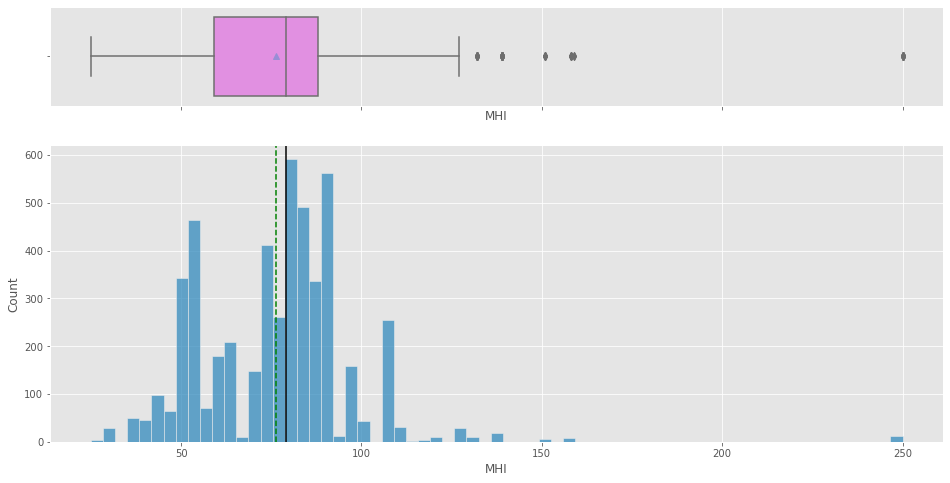

<IPython.core.display.Javascript object>

In [59]:
histogram_boxplot(loan, "MHI")

* A distribution of the `Median Household Income` left-skeewed (see the mean on the left of the median) and a very long tail on the right signified by big values or outliers.

* Let's review what is the profile of customers living in an area where the `MHI` is 175K+ and see if we can infer that those values are real good ones and not `insane` outliers.

In [60]:
# customers living in areas with `Median Household Income` > 175K
loan[loan.MHI > 175]

,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI
161,80,2,2.8,1,0,0,0,0,1,0,Senior-Aged Adults,Expert,250
334,45,1,1.3,2,0,0,0,0,1,0,Old-Aged Adults,Advanced,250
1518,64,4,3.0,3,221,1,0,0,1,0,Middle-Aged Adults,Intermediate,250
1756,23,2,0.0,3,0,0,0,0,0,0,Middle-Aged Adults,Intermediate,250
2398,90,2,0.3,1,217,0,1,0,0,1,Old-Aged Adults,Advanced,250
2686,81,2,0.4,3,0,0,0,0,0,0,Old-Aged Adults,Advanced,250
2997,80,4,1.6,2,0,0,0,0,0,0,Old-Aged Adults,Expert,250
3124,198,2,2.8,1,0,0,0,0,1,1,Middle-Aged Adults,Advanced,250
3458,191,2,2.8,1,231,0,0,0,0,1,Old-Aged Adults,Advanced,250
3815,28,4,0.3,1,96,0,0,0,1,0,Middle-Aged Adults,Intermediate,250


<IPython.core.display.Javascript object>

* As we can see customers living in that `MHI` area level are mostly a _**few**_ `Middle-Aged Adults`, but _**mostly**_ `Old-Aged` and `Senior-Aged` Adults.

## Observations on Family

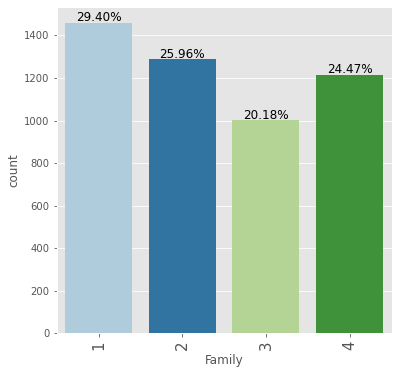

<IPython.core.display.Javascript object>

In [61]:
labeled_barplot(loan, "Family", perc=True)

* The majority of customers are in a family of `1` or `2` members, followed by family of 4-members and with the lowest occurences for family of `3` members. 

## Observations on CCAvg

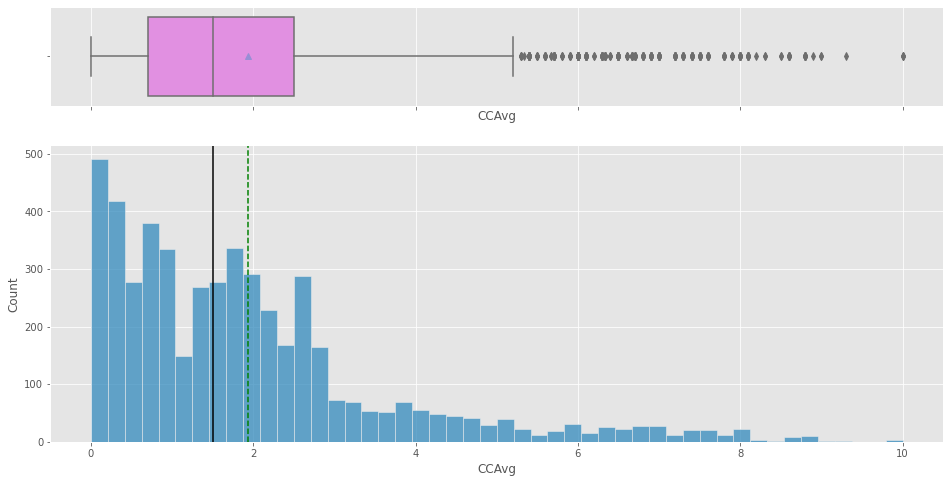

<IPython.core.display.Javascript object>

In [62]:
histogram_boxplot(loan, "CCAvg")

* A mean of 2K for `CCAvg` spending in average per month, with a very heavy right skewed distribution.

* However, let's find out who is spending that _**obscene**_ amount of 8K+ in `CCAvg` per month.

In [63]:
# customers spending > 8K in `CCAvg` per month.
loan[loan.CCAvg > 8]

,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI
9,180,1,8.9,3,0,1,0,0,0,0,Middle-Aged Adults,Entry,72
18,193,2,8.1,3,0,1,0,0,0,0,Old-Aged Adults,Advanced,70
462,183,3,8.3,3,0,1,0,0,1,0,Young Adults,Entry,74
614,180,1,8.6,1,0,0,0,0,1,1,Middle-Aged Adults,Intermediate,55
740,195,1,8.1,1,0,0,0,0,0,0,Old-Aged Adults,Advanced,139
787,202,3,10.0,3,0,1,0,0,0,0,Middle-Aged Adults,Intermediate,90
807,162,1,8.1,1,0,0,0,0,1,0,Old-Aged Adults,Advanced,83
881,154,2,8.8,1,0,0,0,0,1,0,Middle-Aged Adults,Intermediate,79
915,184,1,8.1,1,303,0,0,0,1,0,Old-Aged Adults,Advanced,89
917,200,2,8.8,1,0,0,0,0,1,1,Middle-Aged Adults,Advanced,75


<IPython.core.display.Javascript object>

* As we can see the spending looks too high for customers living in a low income area. This is an _**alert**_ for the Bank.

* In particular, we see in the row `2769` a customer of `Entry` level with a `Mortgage` of `582K` spending in average of _**8.8K**_ per month. Big _**alert**_ here.

* **However, I decided to leave this data as it is for now. If we have to come back here for modifications we may do so subject to the performance of the model.**

* We do not have enough `business knowledge` at all to base a criteria for removing those observations out of the dataset. This is an area of attention for us.

## Observations on Education

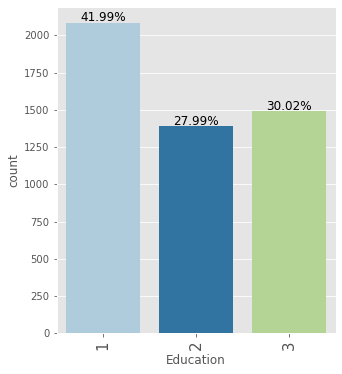

<IPython.core.display.Javascript object>

In [64]:
labeled_barplot(loan, "Education", perc=True)

* Most customers (41.9%) have an undergrad educational level. The remaining 58.1% has a Graduate/Advanced Professional level of Education.

## Observations on Mortgage

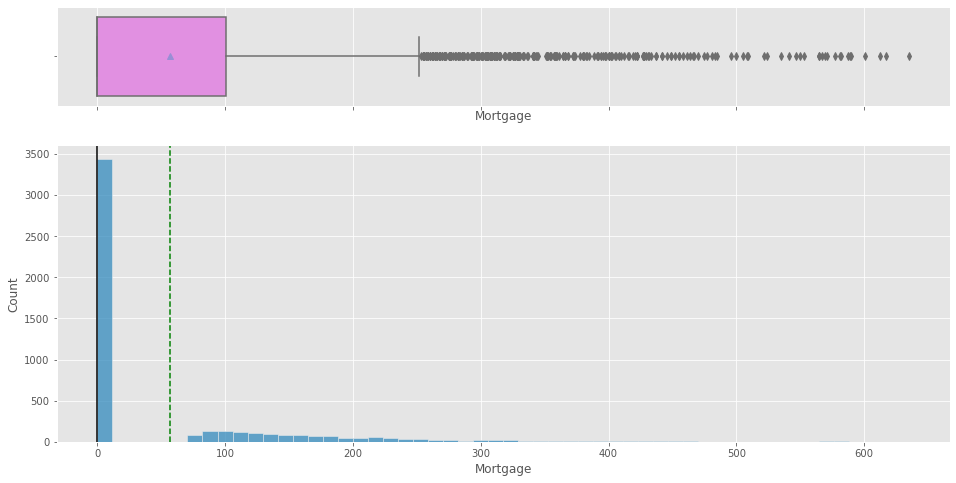

<IPython.core.display.Javascript object>

In [65]:
histogram_boxplot(loan, "Mortgage")

* Most customers don't have a mortgage. 

* The approach will be to have ranges (brackets/bins) of mortgage values.

* A high mortgage bracket may or may not be a potential candidate for targeting him/her as a `asset customer`.

In [66]:
# let's review the status of our data so far
loan

,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI
0,49,4,1.6,1,0,0,1,0,0,0,Young Adults,Entry,77
1,34,3,1.5,1,0,0,1,0,0,0,Middle-Aged Adults,Intermediate,55
2,11,1,1.0,1,0,0,0,0,0,0,Middle-Aged Adults,Intermediate,73
3,100,1,2.7,2,0,0,0,0,0,0,Middle-Aged Adults,Entry,88
4,45,4,1.0,2,0,0,0,0,0,1,Middle-Aged Adults,Entry,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0,0,1,0,Young Adults,Entry,85
4996,15,4,0.4,1,85,0,0,0,1,0,Young Adults,Entry,83
4997,24,2,0.3,3,0,0,0,0,0,0,Senior-Aged Adults,Expert,72
4998,49,3,0.5,2,0,0,0,0,1,0,Senior-Aged Adults,Expert,55


<IPython.core.display.Javascript object>

In [67]:
# creating a temporary copy for safety now
loanMortgage = loan.copy()

<IPython.core.display.Javascript object>

**Creating bins of Mortage values**

In [68]:
# the following intervals will be created for the variable `Mortgage`.
# This may also help create a decision tree with less branches.
# and see the relationship between people without mortgage and with some mortgage amount.

loan["Mortgage_bin"] = pd.cut(
    loan["Mortgage"],
    bins=[-0.001, 1.0, 100, 300, 400, 500, 670],
    labels=[
        "NoMort",
        "0-100",
        "100-300",
        "300-400",
        "400-500",
        "500+",
    ],
)

<IPython.core.display.Javascript object>

In [69]:
loan.sample(6)

,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI,Mortgage_bin
1336,42,1,1.33,1,0,0,0,0,1,0,Middle-Aged Adults,Intermediate,60,NoMort
1140,13,4,0.30,1,0,0,0,0,1,1,Middle-Aged Adults,Entry,59,NoMort
962,120,1,0.00,1,135,0,0,0,0,0,Old-Aged Adults,Advanced,51,100-300
3068,90,2,4.50,3,0,0,0,0,0,0,Old-Aged Adults,Advanced,79,NoMort
4513,114,1,1.70,1,0,0,0,0,1,0,Middle-Aged Adults,Intermediate,57,NoMort
2963,41,1,1.90,3,0,0,0,0,1,1,Young Adults,Entry,89,NoMort


<IPython.core.display.Javascript object>

## Observations on Securities_Account

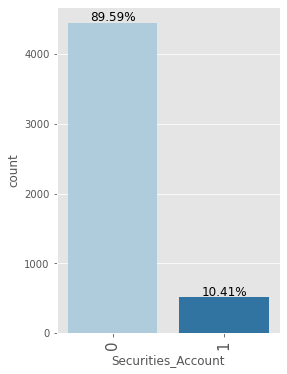

<IPython.core.display.Javascript object>

In [70]:
labeled_barplot(loan, "Securities_Account", perc=True)

* Almost 90% of customers don't have a Securities account with the bank.

## Observations on CD_Account

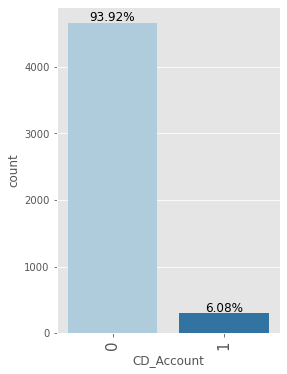

<IPython.core.display.Javascript object>

In [71]:
labeled_barplot(loan, "CD_Account", perc=True)

* Only 6% of customers have a CD Account with the bank.

## Observations on Online

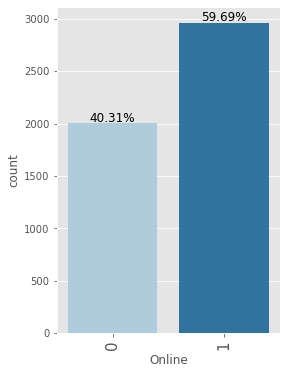

<IPython.core.display.Javascript object>

In [72]:
labeled_barplot(loan, "Online", perc=True)

* The ratio of customers with online access to no-online access is 60/40.

## Observations on CreditCard

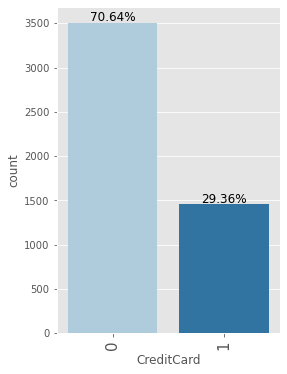

<IPython.core.display.Javascript object>

In [73]:
labeled_barplot(loan, "CreditCard", perc=True)

* The proportion of customers using internet banking to those who don't use it is ~70/30.

## Data Cleaning

### ZIPCode (Summary)

* We have merged along with the Univariate Analysis the Data Cleaning Process.

* We created from the original variable `ZIPCode` a list of invalid `zip codes` via the use of the package `uszipcodes`.

* We found 4 `invalid` __*ZIP Codes*__ and eliminated them.

* Once we found those `invalid` codes we went and delete 34 rows containing those `ZIPCodes`.

* By using again the `uszipcodes` package we extracted the `Major City` of the `ZIPCode`.

* We finalized getting `Median Household Income` from `uszipcodes` and _**impute**_ missing data using `business knowledge` for the city of `Sacramento`.

In [74]:
# status of the dataset for now
loan

,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI,Mortgage_bin
0,49,4,1.6,1,0,0,1,0,0,0,Young Adults,Entry,77,NoMort
1,34,3,1.5,1,0,0,1,0,0,0,Middle-Aged Adults,Intermediate,55,NoMort
2,11,1,1.0,1,0,0,0,0,0,0,Middle-Aged Adults,Intermediate,73,NoMort
3,100,1,2.7,2,0,0,0,0,0,0,Middle-Aged Adults,Entry,88,NoMort
4,45,4,1.0,2,0,0,0,0,0,1,Middle-Aged Adults,Entry,90,NoMort
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0,0,1,0,Young Adults,Entry,85,NoMort
4996,15,4,0.4,1,85,0,0,0,1,0,Young Adults,Entry,83,0-100
4997,24,2,0.3,3,0,0,0,0,0,0,Senior-Aged Adults,Expert,72,NoMort
4998,49,3,0.5,2,0,0,0,0,1,0,Senior-Aged Adults,Expert,55,NoMort


<IPython.core.display.Javascript object>

## Bivariate Analysis

In [75]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

## Age_bins and Personal_Loan

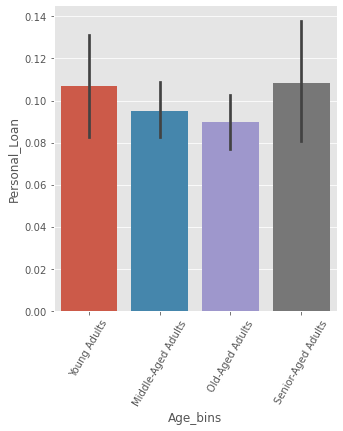

<IPython.core.display.Javascript object>

In [76]:
ax = sns.catplot(x="Age_bins", y="Personal_Loan", data=loan, kind="bar")
ax.set_xticklabels(rotation=60)
plt.show()

* It seems the segment `'Young Adults'` and `'Senior-Aged Adults'` are in higher proportion of having a `Personal_Loan`.

## Family and Personal Loan

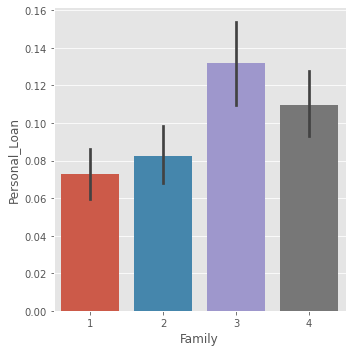

<IPython.core.display.Javascript object>

In [77]:
# stacked_barplot(loan, "Family", "Personal_Loan")
sns.catplot(x="Family", y="Personal_Loan", data=loan, kind="bar")
plt.show()

## Education and Personal Loan

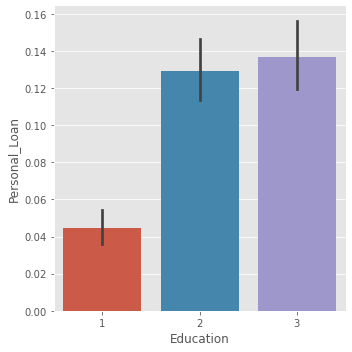

<IPython.core.display.Javascript object>

In [78]:
# stacked_barplot(loan, "Family", "Personal_Loan")
sns.catplot(x="Education", y="Personal_Loan", data=loan, kind="bar")
plt.show()

## Securities Account and Personal Loan

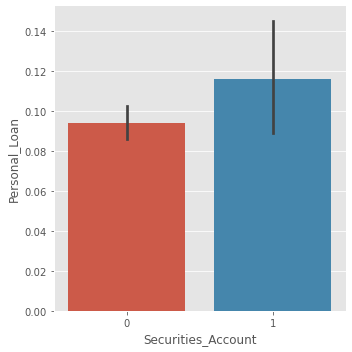

<IPython.core.display.Javascript object>

In [79]:
# stacked_barplot(loan, "Family", "Personal_Loan")
sns.catplot(x="Securities_Account", y="Personal_Loan", data=loan, kind="bar")
plt.show()

## CD Account and Personal Loan

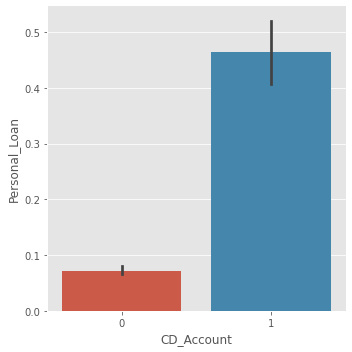

<IPython.core.display.Javascript object>

In [80]:
# stacked_barplot(loan, "Family", "Personal_Loan")
sns.catplot(x="CD_Account", y="Personal_Loan", data=loan, kind="bar")
plt.show()

## Online and Personal Loan

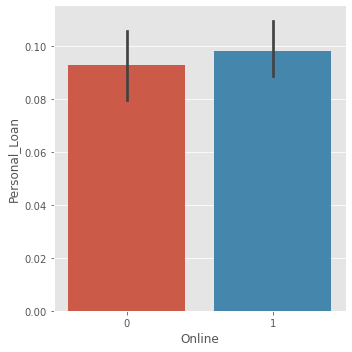

<IPython.core.display.Javascript object>

In [81]:
# stacked_barplot(loan, "Family", "Personal_Loan")
sns.catplot(x="Online", y="Personal_Loan", data=loan, kind="bar")
plt.show()

## CreditCard and Personal Loan

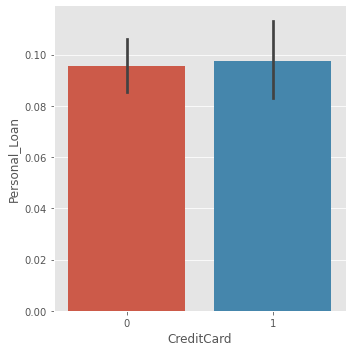

<IPython.core.display.Javascript object>

In [82]:
# stacked_barplot(loan, "Family", "Personal_Loan")
sns.catplot(x="CreditCard", y="Personal_Loan", data=loan, kind="bar")
plt.show()

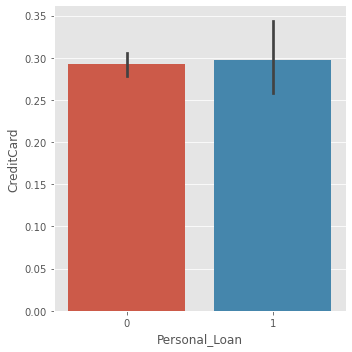

<IPython.core.display.Javascript object>

In [83]:
sns.catplot(x="Personal_Loan", y="CreditCard", data=loan, kind="bar")
plt.show()

* There's not much difference between people having or not having a `Personal_Loan`. The proportion is similar. What is different is the level of `confidence` when they have a `Personal_Loan` which is wider (vertical black bar) than in the other case.

## CCAvg and Personal_Loan

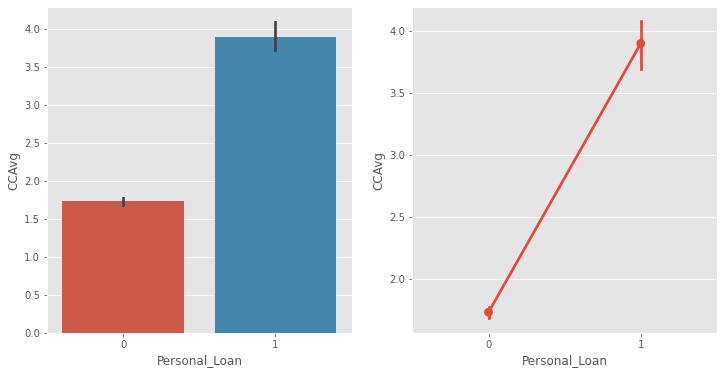

<IPython.core.display.Javascript object>

In [84]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x="Personal_Loan", y="CCAvg", data=loan, ax=axs[0])
sns.pointplot(x="Personal_Loan", y="CCAvg", data=loan, ax=axs[1])
plt.show()

* A `higher` average amount of consumption using `credit card` is always present when the customer has a `Personal_Loan`. 

* The `CCAvg` is almost double when exist a `Personal_Loan` than when the customer don't have one.

## MHI (Median Household Income) and Personal_Loan

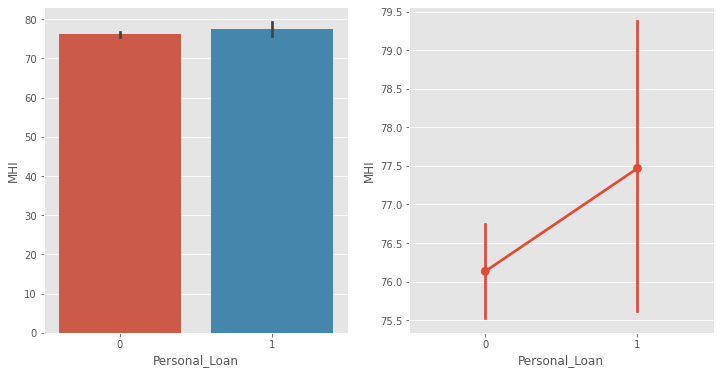

<IPython.core.display.Javascript object>

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.barplot(x="Personal_Loan", y="MHI", data=loan, ax=axs[0])
sns.pointplot(x="Personal_Loan", y="MHI", data=loan, ax=axs[1])
plt.show()

* I decided to use a barplot along with a pointplot> The point plot shows only the mean (or other estimator) value and it's more descriptive than the barplot.

* The plot shows that a `"higher"` median value for `MHI` is always present when the customer has already a `Personal_Loan` compared to the case when they don't have it.

## Multivariate Analysis

* `Multivariate analysis` is used to study more complex sets of data than what `Univariate analysis` methods can handle.

## Family, Education, and Personal Loan

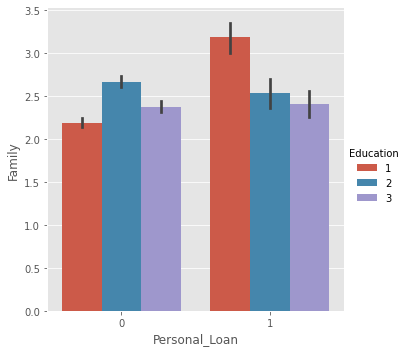

<IPython.core.display.Javascript object>

In [86]:
sns.catplot(x="Personal_Loan", y="Family", data=loan, kind="bar", hue="Education")
plt.xticks()
plt.show()

* People with `Undergraduate` level has `Personal_Loan` when their `Family` members are at least `3`.

* In general, it seems the `Graduate` and `Advanced/Professional` maintain the same proportion to have or not a `Personal_Loan` and the `Family` is always at max `2` members.

## Education, CreditCard, and Personal Loan

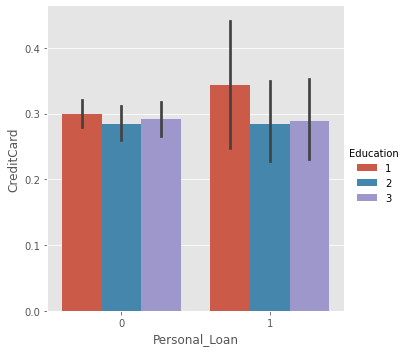

<IPython.core.display.Javascript object>

In [87]:
sns.catplot(x="Personal_Loan", y="CreditCard", data=loan, kind="bar", hue="Education")
plt.xticks()
plt.show()

* Higher presence of `Personal_Loan` when use of `CreditCard` is higher among `Undergrad` (level 1) customers.

## CD Account, Securities Account, and Personal Loan

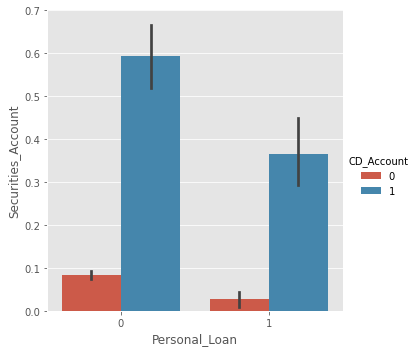

<IPython.core.display.Javascript object>

In [88]:
sns.catplot(
    x="Personal_Loan", y="Securities_Account", data=loan, kind="bar", hue="CD_Account"
)
plt.xticks()
plt.show()

* Having a `Security_Account` is highly present in the absence of `Personal_Loan`.

* A `CD_Account` is also prevalent when customer don't have a `Personal_Loan`.

## CC Avg, Education, and Personal Loan

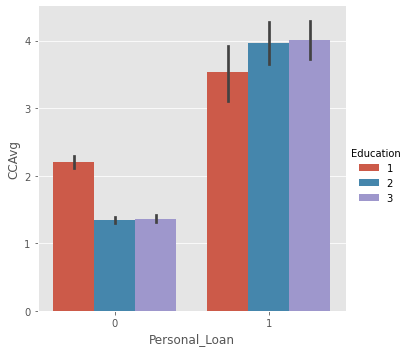

<IPython.core.display.Javascript object>

In [89]:
sns.catplot(x="Personal_Loan", y="CCAvg", data=loan, kind="bar", hue="Education")
plt.xticks()
plt.show()

* Any level of `Education` may not be determinant to have a `Personal_Loan` but a higher `CCAvg` per month. 

* When the use of `CCAvg` per month is low the high probability is that the customes has no a `Personal_Loan` regardless of his `Education` level,

## Mortgage, Education, and Personal Loan

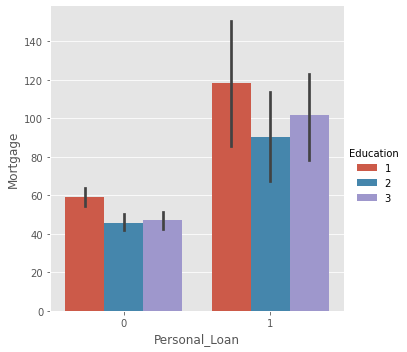

<IPython.core.display.Javascript object>

In [90]:
sns.catplot(x="Personal_Loan", y="Mortgage", data=loan, kind="bar", hue="Education")
plt.xticks()
plt.show()

* Low `Mortgage` has a low probability of getting a `Personal_Loan`, while a high `Mortage` at any level of `Education` has a high chance of getting a `Personal_Loan`.

In [91]:
# dropping `Mortgage` as now we have discretized the variable.
loan.drop(axis=1, columns=["Mortgage"], inplace=True)
# status of the dataset
loan

,Income,Family,CCAvg,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI,Mortgage_bin
0,49,4,1.6,1,0,1,0,0,0,Young Adults,Entry,77,NoMort
1,34,3,1.5,1,0,1,0,0,0,Middle-Aged Adults,Intermediate,55,NoMort
2,11,1,1.0,1,0,0,0,0,0,Middle-Aged Adults,Intermediate,73,NoMort
3,100,1,2.7,2,0,0,0,0,0,Middle-Aged Adults,Entry,88,NoMort
4,45,4,1.0,2,0,0,0,0,1,Middle-Aged Adults,Entry,90,NoMort
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0,1,0,Young Adults,Entry,85,NoMort
4996,15,4,0.4,1,0,0,0,1,0,Young Adults,Entry,83,0-100
4997,24,2,0.3,3,0,0,0,0,0,Senior-Aged Adults,Expert,72,NoMort
4998,49,3,0.5,2,0,0,0,1,0,Senior-Aged Adults,Expert,55,NoMort


<IPython.core.display.Javascript object>

## Experience, CreditCard, and Personal Loan

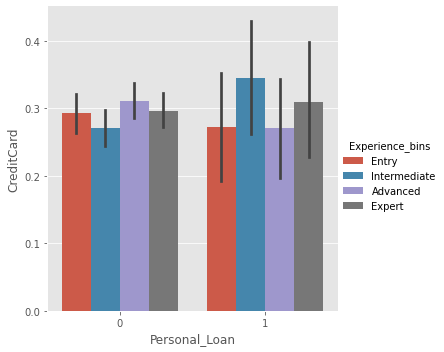

<IPython.core.display.Javascript object>

In [92]:
sns.catplot(
    x="Personal_Loan", y="CreditCard", data=loan, kind="bar", hue="Experience_bins"
)
plt.xticks()
plt.show()

* `Intermediate` level of `Experience` along with having a `CreditCard` in another bank is present when customers have a `Personal_Loan`.

## CCAvg, Experience, and Personal Loan

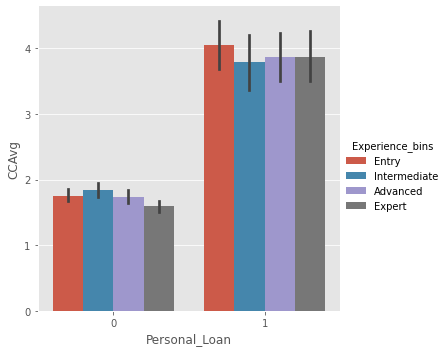

<IPython.core.display.Javascript object>

In [93]:
sns.catplot(x="Personal_Loan", y="CCAvg", data=loan, kind="bar", hue="Experience_bins")
plt.xticks()
plt.show()

* Higher use of `CCAvg` per month is always present when customers have a `Personal_Loan` regardless of their `Experience` level.

In [94]:
# status of the data set
loan

,Income,Family,CCAvg,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI,Mortgage_bin
0,49,4,1.6,1,0,1,0,0,0,Young Adults,Entry,77,NoMort
1,34,3,1.5,1,0,1,0,0,0,Middle-Aged Adults,Intermediate,55,NoMort
2,11,1,1.0,1,0,0,0,0,0,Middle-Aged Adults,Intermediate,73,NoMort
3,100,1,2.7,2,0,0,0,0,0,Middle-Aged Adults,Entry,88,NoMort
4,45,4,1.0,2,0,0,0,0,1,Middle-Aged Adults,Entry,90,NoMort
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0,1,0,Young Adults,Entry,85,NoMort
4996,15,4,0.4,1,0,0,0,1,0,Young Adults,Entry,83,0-100
4997,24,2,0.3,3,0,0,0,0,0,Senior-Aged Adults,Expert,72,NoMort
4998,49,3,0.5,2,0,0,0,1,0,Senior-Aged Adults,Expert,55,NoMort


<IPython.core.display.Javascript object>

## Key Observations


* The original dataset has 5000 rows and 14 columns of data

* There are no missing vaues in the dataset.

* Personal_Loan is the dependent variable - type integer.

* All the independent variables including ID but CCAvg (float type) are integer type. These variables however are binary (1 or 0) except for ZIPCode and CCAvg.

* 90.4% of the customers have not applied for a loan yet.

* There are observations with negative values in 'Experience'. We will modified them using their absolute values.

* Ages are all distributed from 23-yrs old to 67-yrs old.

* Tails of the distribution are on the younger and older segments.

* Ages 35, 43, 53, 54, and 58 are the most populated segments with more than 140 people in each.

* Removing Age and Experience. Working only with the statified versions of them: Age_bins , and Experience_bins.

* The distribution on `Income` is right skewed with several outliers showing in the boxplot.

* There are 34 observations in `ZIPCode` with invalid ZIP Codes which we removed from the dataset.

* We did some imputation on `Median Household Income` a new `feature engineered` variable based on `ZIPCode`.

* We did utilize some business knowledge for doing that on `Median Household Income` for the City of Sacramento.

* For the missing values on `Median Household Income` we Impute the median value of the Median Household Income (MHI) on every correspondent City PO (City Post Office).

* Converted Median Household Income (MHI) to multiples of 1,000's limited to 1 decimal digit.

* A distribution of the `Median Household Income` left-skeewed (see the mean on the left of the median) and a very long tail on the right signified by big values or outliers.

* We reviewed some `potential` outliers and these values looked reasonable after all and not `insane` outliers.

* The majority of customers are in a family of 1 or 2 members, followed by family of 4-members and with the lowest occurences for family of 3 members.

* On the CCAvg per month we have a mean of 2K, with a very heavy right skewed distribution.

* We noticed an obscene amount of 8K in CCAvg per month. We  can see the spending looks too high for customers living in a low income area. This is an alert for the Bank.

* In particular, we see in the row 2769 a customer of Entry level with a Mortgage of 582K spending in average of 8.8K per month. Big alert here.

* However, I decided to leave this data as it is for now because we don't too much business knwoledge at hand. If we have to come back here for modifications we may do so subject to the performance of the model.

* Most customers (41.9%) have an undergrad educational level. The remaining 58.1% has a Graduate/Advanced Professional level of Education.

* We decided to create stratified `Mortgage` brackets.


### Data Cleaning, Feature Engineering and Data Imputation.

* We created from the original variable ZIPCode a list of invalid zip codes via the use of the package uszipcodes.

* We found 4 invalid ZIP Codes and eliminated them.

* Once we found those invalid codes we went and delete 34 rows containing those ZIPCodes.

* By using again the uszipcodes package we extracted the Major City of the ZIPCode.

* We finalized getting Median Household Income from uszipcodes and impute missing data using business knowledge.

### Bivariate & MultiVariate Analysis

* A `higher` average amount of consumption using `credit card` is always present when the customer has a `Personal_Loan`. 

* The `CCAvg` is almost double when exist a `Personal_Loan` than when the customer don't have one.

* In the Age_bins the segment 'Young Adults' and 'Senior-Aged Adults' are in higher proportion showing a Personal_Loan.

* People with Undergraduate level has Personal_Loan when their Family members are at least 3.

* In general, it seems the Graduate and Advanced/Professional maintain the same proportion to have or not a Personal_Loan and the Family is always at max 2 members.

* Higher presence of Personal_Loan when use of CreditCard is higher among Undergrad (level 1) customers.

* Having a Security_Account is highly present in the absence of Personal_Loan.

* A CD_Account is also prevalent when customer don't have a Personal_Loan.

* Any level of Education may not be determinant to have a Personal_Loan but a higher CCAvg per month.

* When the use of CCAvg per month is low the high probability is that the customes has no a Personal_Loan regardless of his Education level,

* Low `Mortgage` has a low probability of getting a `Personal_Loan`, while a high `Mortgage` at any level of `Education` has a high chance of getting a `Personal_Loan`.

* Intermediate level of Experience along with having a CreditCard in another bank is present when customers have a Personal_Loan.

* Higher use of CCAvg per month is always present when customers have a Personal_Loan regardless of their Experience level.

<h2><font color='darkgreen', size="6"><strong>Model Building: Logistic Regression & Decision Tree</strong></font></h2>

<h2><font color='darkgreen', size="5"><strong> Model evaluation criterion</strong></font></h2>

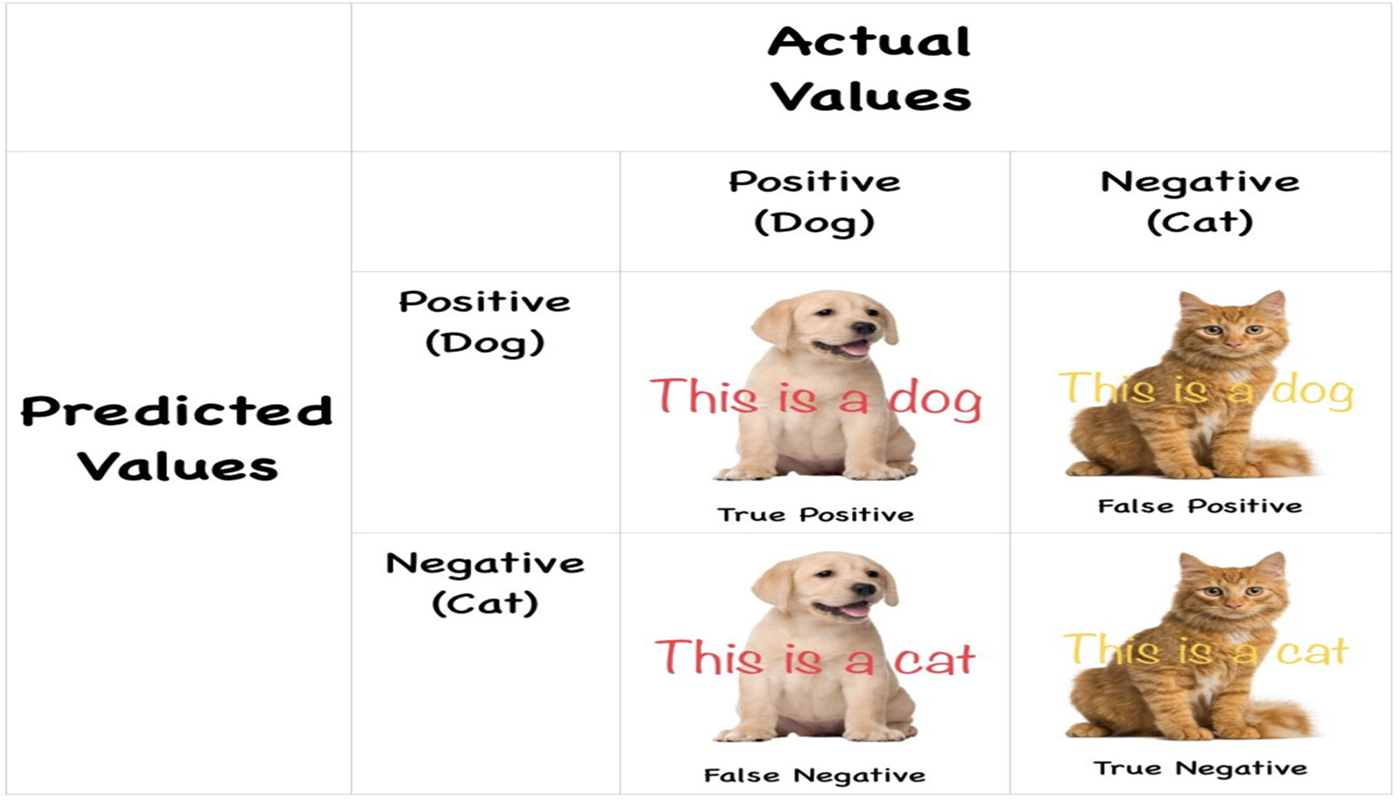

### Model can make wrong predictions as:
 
1. Predicting a customer will accept a loan (an `asset` customer: Personal_Loan = 1) and the customer actually did not accept the loan (is a `liability` customer: Personal_Loan = 0) == FP.

2. Predicting a customer will NOT accept a loan (a `liability` customer: Personal_Loan = 0) and the customer actually did accept the loan (is an `asset` customer: Personal_Loan = 1) == FN.

### Which case is more important? 

* If we predict the customer is an `asset` customer (Personal_Loan = 1) and the customer is actually a `liability` customer (Personal_Loan = 0), __**bank may be allocating resources in the wrong place**__.

* If we predict the customer is a `liability` customer (Personal_Loan = 0) meaning it will not accept a loan and the customer actually did accept the loan (Personal_Loan = 1, is an `asset` customer), __*bank would lose an opportunity of earning more through the interest on loans*__.

### How to reduce this loss i.e need to reduce False Negatives?

* `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

<h1><font color='darkgreen', size="6"><strong>Logistic Regression Model Building - Approach</strong></font></h1>

1. Data preparation
2. Partition the data into train and test set.
3. Built a Logistic Regression model on the train data.
4. Tune the model.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [95]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn_with_threshold(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [96]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [97]:
# creating a safety copy for setting up the `Logistic Regression` Model
data = loan.copy()

<IPython.core.display.Javascript object>

In [98]:
# current status of the `engineered` dataset
data

,Income,Family,CCAvg,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI,Mortgage_bin
0,49,4,1.6,1,0,1,0,0,0,Young Adults,Entry,77,NoMort
1,34,3,1.5,1,0,1,0,0,0,Middle-Aged Adults,Intermediate,55,NoMort
2,11,1,1.0,1,0,0,0,0,0,Middle-Aged Adults,Intermediate,73,NoMort
3,100,1,2.7,2,0,0,0,0,0,Middle-Aged Adults,Entry,88,NoMort
4,45,4,1.0,2,0,0,0,0,1,Middle-Aged Adults,Entry,90,NoMort
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0,1,0,Young Adults,Entry,85,NoMort
4996,15,4,0.4,1,0,0,0,1,0,Young Adults,Entry,83,0-100
4997,24,2,0.3,3,0,0,0,0,0,Senior-Aged Adults,Expert,72,NoMort
4998,49,3,0.5,2,0,0,0,1,0,Senior-Aged Adults,Expert,55,NoMort


<IPython.core.display.Javascript object>

#### Let's create a list of numerical and categorical columns

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Income              4966 non-null   int64   
 1   Family              4966 non-null   int64   
 2   CCAvg               4966 non-null   float64 
 3   Education           4966 non-null   int64   
 4   Personal_Loan       4966 non-null   int64   
 5   Securities_Account  4966 non-null   int64   
 6   CD_Account          4966 non-null   int64   
 7   Online              4966 non-null   int64   
 8   CreditCard          4966 non-null   int64   
 9   Age_bins            4966 non-null   category
 10  Experience_bins     4966 non-null   category
 11  MHI                 4966 non-null   int64   
 12  Mortgage_bin        4966 non-null   category
dtypes: category(3), float64(1), int64(9)
memory usage: 571.0 KB


<IPython.core.display.Javascript object>

* Most of the numerical variables are of data type `int64` and will be converted to `categorical`. They represent only a `status` `1` or `0`.

In [100]:
## Split Data

X = data.drop(["Personal_Loan"], axis=1)
y = data["Personal_Loan"]

<IPython.core.display.Javascript object>

In [101]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,Income,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard,MHI,Age_bins_Middle-Aged Adults,Age_bins_Old-Aged Adults,Age_bins_Senior-Aged Adults,Experience_bins_Intermediate,Experience_bins_Advanced,Experience_bins_Expert,Mortgage_bin_0-100,Mortgage_bin_100-300,Mortgage_bin_300-400,Mortgage_bin_400-500,Mortgage_bin_500+
0,49,4,1.6,1,1,0,0,0,77,0,0,0,0,0,0,0,0,0,0,0
1,34,3,1.5,1,1,0,0,0,55,1,0,0,1,0,0,0,0,0,0,0
2,11,1,1.0,1,0,0,0,0,73,1,0,0,1,0,0,0,0,0,0,0
3,100,1,2.7,2,0,0,0,0,88,1,0,0,0,0,0,0,0,0,0,0
4,45,4,1.0,2,0,0,0,1,90,1,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [103]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3476
Number of rows in test data = 1490


<IPython.core.display.Javascript object>

In [104]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905351
1    0.094649
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900671
1    0.099329
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

### Logistic Regression

In [105]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

### Finding the coefficients

In [106]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Income,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard,MHI,Age_bins_Middle-Aged Adults,Age_bins_Old-Aged Adults,Age_bins_Senior-Aged Adults,Experience_bins_Intermediate,Experience_bins_Advanced,Experience_bins_Expert,Mortgage_bin_0-100,Mortgage_bin_100-300,Mortgage_bin_300-400,Mortgage_bin_400-500,Mortgage_bin_500+,Intercept
Coefficients,0.054256,0.707838,0.120142,1.548282,-0.845137,3.584136,-0.533333,-0.928019,0.002193,0.059457,0.48632,0.091357,-0.103535,-0.373601,0.02049,0.051226,-0.059906,0.579447,0.344442,-0.473883,-13.329694


<IPython.core.display.Javascript object>

In [107]:
coef_df.T.values.sort()

<IPython.core.display.Javascript object>

In [108]:
coef_df

,Coefficients
Income,-13.329694
Family,-0.928019
CCAvg,-0.845137
Education,-0.533333
Securities_Account,-0.473883
CD_Account,-0.373601
Online,-0.103535
CreditCard,-0.059906
MHI,0.002193
Age_bins_Middle-Aged Adults,0.020490


<IPython.core.display.Javascript object>

### Coefficient interpretations

* Coefficient of Income, Family, CCAvg, Education, Securities_Account, CD_Account, and Online are negative, increase in these will lead to decrease in chances of a person to be an `asset customer`. 
* Coefficient all the levels of Age, Experience, Mortgage, and MHI where a positive increase in these will lead to increase in chances of a person to be an `asset customer`.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of $log(odd)$, to find the odds we have to take the exponential of the coefficients. 
* Therefore, **$odds =  e^{b}$**
* The percentage change in odds is given as **$odds = (e^{b} - 1) * 100$**

#### Odds from coefficients

In [109]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Income,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard,MHI,Age_bins_Middle-Aged Adults,Age_bins_Old-Aged Adults,Age_bins_Senior-Aged Adults,Experience_bins_Intermediate,Experience_bins_Advanced,Experience_bins_Expert,Mortgage_bin_0-100,Mortgage_bin_100-300,Mortgage_bin_300-400,Mortgage_bin_400-500,Mortgage_bin_500+
Odds,1.055755,2.029598,1.127657,4.703384,0.429499,36.02223,0.586646,0.395336,1.002195,1.061260,1.626320,1.095660,0.901645,0.688252,1.020701,1.052561,0.941854,1.785051,1.411203,0.622580
Change_odd%,5.575463,102.959779,12.765679,370.338440,-57.050128,3502.22296,-41.335352,-60.466391,0.219513,6.125976,62.632035,9.565998,-9.835535,-31.174820,2.070094,5.256082,-5.814648,78.505137,41.120290,-37.742018


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `Income`: Holding all other features constant a 1 unit change in `Income` will increase the odds of a person being an `asset` customer by 1.05 times or an increase in odds of 5.6%.
* `Family`: Holding all other features constant a 1 unit change in the `Family` will increase the odds of a person being an `asset` customer by 2 times or an increase in odds of 102% of being an `asset` customer.
* `CCAvg`: Holding all other features constant a 1 unit change in the `CCAvg` will increase the odds of a person being an `asset` customer by 1.13 times or an increase in odds of almost 13% of being an `asset` customer.

`Interpretation for other attributes can be done similarly.`

#### Checking model performance on training set

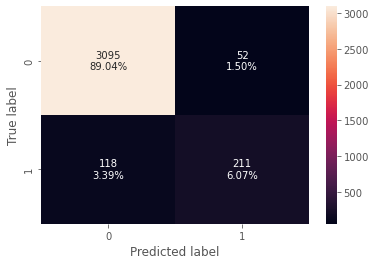

<IPython.core.display.Javascript object>

In [110]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [111]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.951093,0.641337,0.802281,0.712838


<IPython.core.display.Javascript object>

#### Checking performance on test set

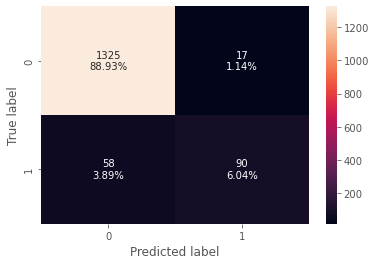

<IPython.core.display.Javascript object>

In [112]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [113]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.949664,0.608108,0.841121,0.705882


<IPython.core.display.Javascript object>

#### ROC-AUC

##### * ROC-AUC on training set

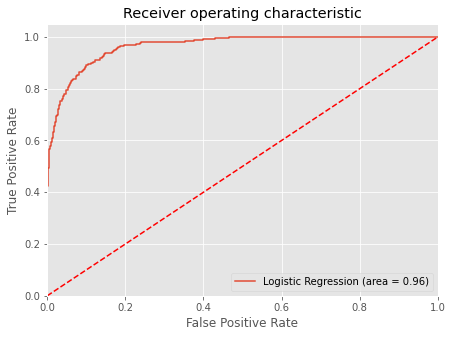

<IPython.core.display.Javascript object>

In [114]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### * ROC-AUC on test set

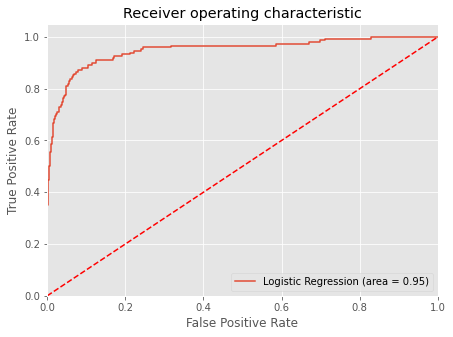

<IPython.core.display.Javascript object>

In [115]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is giving a generalized performance.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [116]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.09468356545196238


<IPython.core.display.Javascript object>

#### Checking model performance on training set

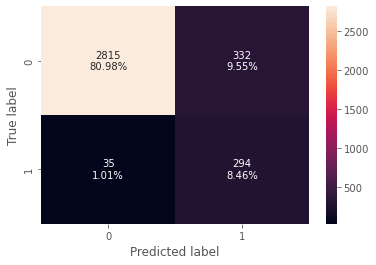

<IPython.core.display.Javascript object>

In [117]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [118]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_auc_roc
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.894419,0.893617,0.469649,0.615707


<IPython.core.display.Javascript object>

#### Checking model performance on test set

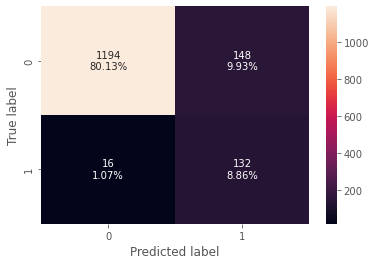

<IPython.core.display.Javascript object>

In [119]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [120]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_auc_roc
    )
)

print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.889933,0.891892,0.471429,0.616822


<IPython.core.display.Javascript object>

* The precision of the model for both training and test set has improved. The `F1 Score` is better but the `Recall` has reduced.

#### Let's use Precision-Recall curve and see if we can find a better threshold

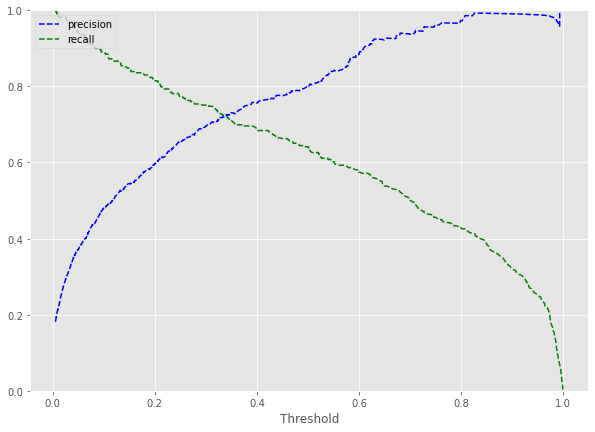

<IPython.core.display.Javascript object>

In [121]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.34, we get balanced recall and precision.

In [122]:
# setting the threshold
optimal_threshold_curve = 0.34

<IPython.core.display.Javascript object>

#### Checking model performance on training set

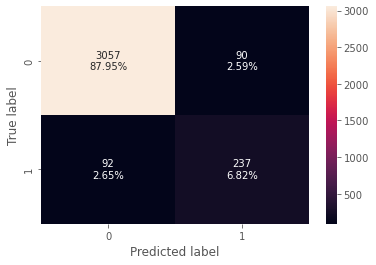

<IPython.core.display.Javascript object>

In [123]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [124]:
log_reg_model_train_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_train, y_train, threshold=optimal_threshold_curve
    )
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.947641,0.720365,0.724771,0.722561


<IPython.core.display.Javascript object>

#### Checking model performance on test set

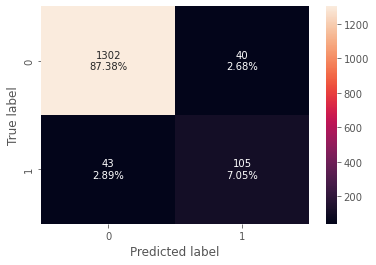

<IPython.core.display.Javascript object>

In [125]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [126]:
log_reg_model_test_perf_threshold_curve = (
    model_performance_classification_sklearn_with_threshold(
        lg, X_test, y_test, threshold=optimal_threshold_curve
    )
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.944295,0.709459,0.724138,0.716724


<IPython.core.display.Javascript object>

* Model is performing well on training and test.
* There's a slightly improvement in the model performance based on the `F1 Score` as the default threshold is 0.50 and here we get 0.34 as the optimal threshold.

### Model Performance Summary

In [127]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.094 Threshold",
    "Logistic Regression-0.34 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.094 Threshold,Logistic Regression-0.34 Threshold
Accuracy,0.951093,0.894419,0.947641
Recall,0.641337,0.893617,0.720365
Precision,0.802281,0.469649,0.724771
F1,0.712838,0.615707,0.722561


<IPython.core.display.Javascript object>

In [128]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.094 Threshold",
    "Logistic Regression-0.34 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.094 Threshold,Logistic Regression-0.34 Threshold
Accuracy,0.949664,0.889933,0.944295
Recall,0.608108,0.891892,0.709459
Precision,0.841121,0.471429,0.724138
F1,0.705882,0.616822,0.716724


<IPython.core.display.Javascript object>

### Conclusion
* We have built a predictive model that may not be used to predict if we can convert a `liability` customer to a `asset` customer. The best F1 Score we got is 0.7167. 
* Coefficient of Income, Family, CCAvg, Education, Securities_Account, CD_Account, and Online are negative, increase in these will lead to decrease in chances of a person to be an `asset customer`. 
* Coefficient all the levels of Age, Experience, Mortgage, and MHI where a positive increase in these will lead to increase in chances of a person to be an `asset customer`.

<h1><font color='darkgreen', size="6"><strong>Decision Tree Model Building - Approach</strong></font></h1>

1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.


In [129]:
# create a safe copy for setting up the Decision Tree Model
data = loan.copy()

<IPython.core.display.Javascript object>

In [130]:
# current status of the `engineered` dataset
data

,Income,Family,CCAvg,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_bins,Experience_bins,MHI,Mortgage_bin
0,49,4,1.6,1,0,1,0,0,0,Young Adults,Entry,77,NoMort
1,34,3,1.5,1,0,1,0,0,0,Middle-Aged Adults,Intermediate,55,NoMort
2,11,1,1.0,1,0,0,0,0,0,Middle-Aged Adults,Intermediate,73,NoMort
3,100,1,2.7,2,0,0,0,0,0,Middle-Aged Adults,Entry,88,NoMort
4,45,4,1.0,2,0,0,0,0,1,Middle-Aged Adults,Entry,90,NoMort
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0,1,0,Young Adults,Entry,85,NoMort
4996,15,4,0.4,1,0,0,0,1,0,Young Adults,Entry,83,0-100
4997,24,2,0.3,3,0,0,0,0,0,Senior-Aged Adults,Expert,72,NoMort
4998,49,3,0.5,2,0,0,0,1,0,Senior-Aged Adults,Expert,55,NoMort


<IPython.core.display.Javascript object>

In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4966 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Income              4966 non-null   int64   
 1   Family              4966 non-null   int64   
 2   CCAvg               4966 non-null   float64 
 3   Education           4966 non-null   int64   
 4   Personal_Loan       4966 non-null   int64   
 5   Securities_Account  4966 non-null   int64   
 6   CD_Account          4966 non-null   int64   
 7   Online              4966 non-null   int64   
 8   CreditCard          4966 non-null   int64   
 9   Age_bins            4966 non-null   category
 10  Experience_bins     4966 non-null   category
 11  MHI                 4966 non-null   int64   
 12  Mortgage_bin        4966 non-null   category
dtypes: category(3), float64(1), int64(9)
memory usage: 571.0 KB


<IPython.core.display.Javascript object>

In [132]:
numeric_cols = data.select_dtypes(include=[np.float64, np.int64]).columns
cat_cols = data.describe(include=["object", "category"]).columns
print("Categorical Columns: ", cat_cols.tolist())
print("Numeric Columns: ", numeric_cols.tolist())

Categorical Columns:  ['Age_bins', 'Experience_bins', 'Mortgage_bin']
Numeric Columns:  ['Income', 'Family', 'CCAvg', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'MHI']


<IPython.core.display.Javascript object>

### Categorical  and Numerical data

#### Checking different levels in Categorical data

In [133]:
# Checking value counts of categorical variables
for i in cat_cols:
    print("Unique values in", i, "are :")
    df_concat = pd.concat(
        [
            data[i].value_counts().to_frame(),
            data[i].value_counts(normalize=True).to_frame().rename(columns={i: "%"}),
        ],
        axis=1,
    )
    print(df_concat)
    print("*" * 50)

Unique values in Age_bins are :
                    Age_bins         %
Old-Aged Adults         1924  0.387435
Middle-Aged Adults      1880  0.378574
Young Adults             618  0.124446
Senior-Aged Adults       544  0.109545
**************************************************
Unique values in Experience_bins are :
              Experience_bins         %
Advanced                 1314  0.264599
Expert                   1277  0.257149
Intermediate             1213  0.244261
Entry                    1162  0.233991
**************************************************
Unique values in Mortgage_bin are :
         Mortgage_bin         %
NoMort           3435  0.691704
100-300          1051  0.211639
0-100             280  0.056383
300-400           127  0.025574
400-500            48  0.009666
500+               25  0.005034
**************************************************


<IPython.core.display.Javascript object>

#### Summary of the numerical data

In [134]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,4966.0,73.827829,46.042272,8.0,39.0,64.0,98.0,224.0
Family,4966.0,2.397100,1.147607,1.0,1.0,2.0,3.0,4.0
CCAvg,4966.0,1.937016,1.743928,0.0,0.7,1.5,2.5,10.0
Education,4966.0,1.880387,0.840197,1.0,1.0,2.0,3.0,3.0
Personal_Loan,4966.0,0.096053,0.294694,0.0,0.0,0.0,0.0,1.0
Securities_Account,4966.0,0.104108,0.305431,0.0,0.0,0.0,0.0,1.0
CD_Account,4966.0,0.060814,0.239012,0.0,0.0,0.0,0.0,1.0
Online,4966.0,0.596859,0.490578,0.0,0.0,1.0,1.0,1.0
CreditCard,4966.0,0.293596,0.455455,0.0,0.0,0.0,1.0,1.0
MHI,4966.0,76.260773,20.794391,25.0,59.0,79.0,88.0,250.0


<IPython.core.display.Javascript object>

## Split Data

In [135]:
X = data.drop(["Personal_Loan"], axis=1)
y = data["Personal_Loan"]

<IPython.core.display.Javascript object>

In [136]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,Income,Family,CCAvg,Education,Securities_Account,CD_Account,Online,CreditCard,MHI,Age_bins_Middle-Aged Adults,Age_bins_Old-Aged Adults,Age_bins_Senior-Aged Adults,Experience_bins_Intermediate,Experience_bins_Advanced,Experience_bins_Expert,Mortgage_bin_0-100,Mortgage_bin_100-300,Mortgage_bin_300-400,Mortgage_bin_400-500,Mortgage_bin_500+
0,49,4,1.6,1,1,0,0,0,77,0,0,0,0,0,0,0,0,0,0,0
1,34,3,1.5,1,1,0,0,0,55,1,0,0,1,0,0,0,0,0,0,0
2,11,1,1.0,1,0,0,0,0,73,1,0,0,1,0,0,0,0,0,0,0
3,100,1,2.7,2,0,0,0,0,88,1,0,0,0,0,0,0,0,0,0,0
4,45,4,1.0,2,0,0,0,1,90,1,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [138]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3476
Number of rows in test data = 1490


<IPython.core.display.Javascript object>

In [139]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905351
1    0.094649
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900671
1    0.099329
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

<h2><font color='darkgreen', size="5"><strong> Model evaluation criterion</strong></font></h2>

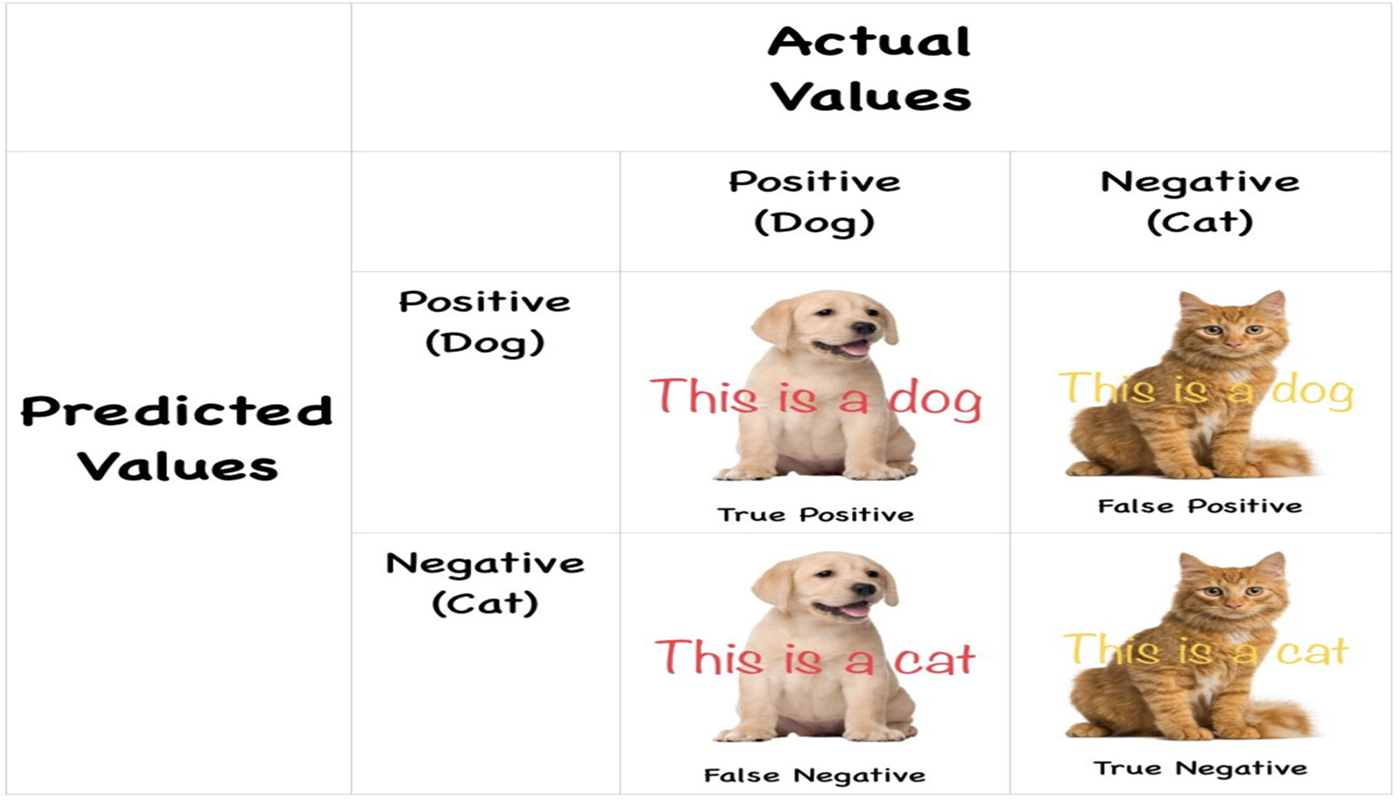

### Model can make wrong predictions as:
 
1. Predicting a customer will accept a loan (an `asset` customer: Personal_Loan = 1) and the customer actually did not accept the loan (is a `liability` customer: Personal_Loan = 0) == FP.

2. Predicting a customer will NOT accept a loan (a `liability` customer: Personal_Loan = 0) and the customer actually did accept the loan (is an `asset` customer: Personal_Loan = 1) == FN.


### Which case is more important? 

* If we predict the customer is an `asset` customer (Personal_Loan = 1) and the customer is actually a `liability` customer (Personal_Loan = 0), __**bank may be allocating resources in the wrong place**__.

* If we predict the customer is a `liability` customer (Personal_Loan = 0) meaning it will not accept a loan and the customer actually did accept the loan (Personal_Loan = 1, is an `asset` customer), __*bank would lose an opportunity of earning more through the interest on loans*__.

### How to reduce this loss i.e need to reduce False Negatives?

* `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [140]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [141]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

<h2><font color='darkgreen', size="5"><strong>Build Decision Tree Model</strong></font></h2>

In [142]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [143]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

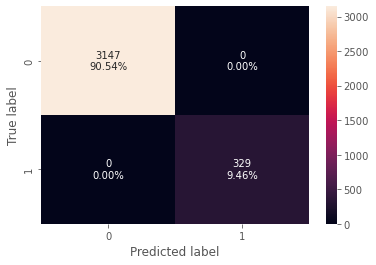

<IPython.core.display.Javascript object>

In [144]:
confusion_matrix_sklearn(model, X_train, y_train)

#### Checking model performance on test set

In [145]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.97651,0.878378,0.884354,0.881356


<IPython.core.display.Javascript object>

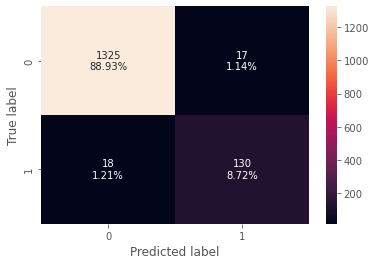

<IPython.core.display.Javascript object>

In [146]:
confusion_matrix_sklearn(model, X_test, y_test)

* Model is giving good and generalized results on training and test set.

## Visualizing the Decision Tree

In [147]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Income', 'Family', 'CCAvg', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'MHI', 'Age_bins_Middle-Aged Adults', 'Age_bins_Old-Aged Adults', 'Age_bins_Senior-Aged Adults', 'Experience_bins_Intermediate', 'Experience_bins_Advanced', 'Experience_bins_Expert', 'Mortgage_bin_0-100', 'Mortgage_bin_100-300', 'Mortgage_bin_300-400', 'Mortgage_bin_400-500', 'Mortgage_bin_500+']


<IPython.core.display.Javascript object>

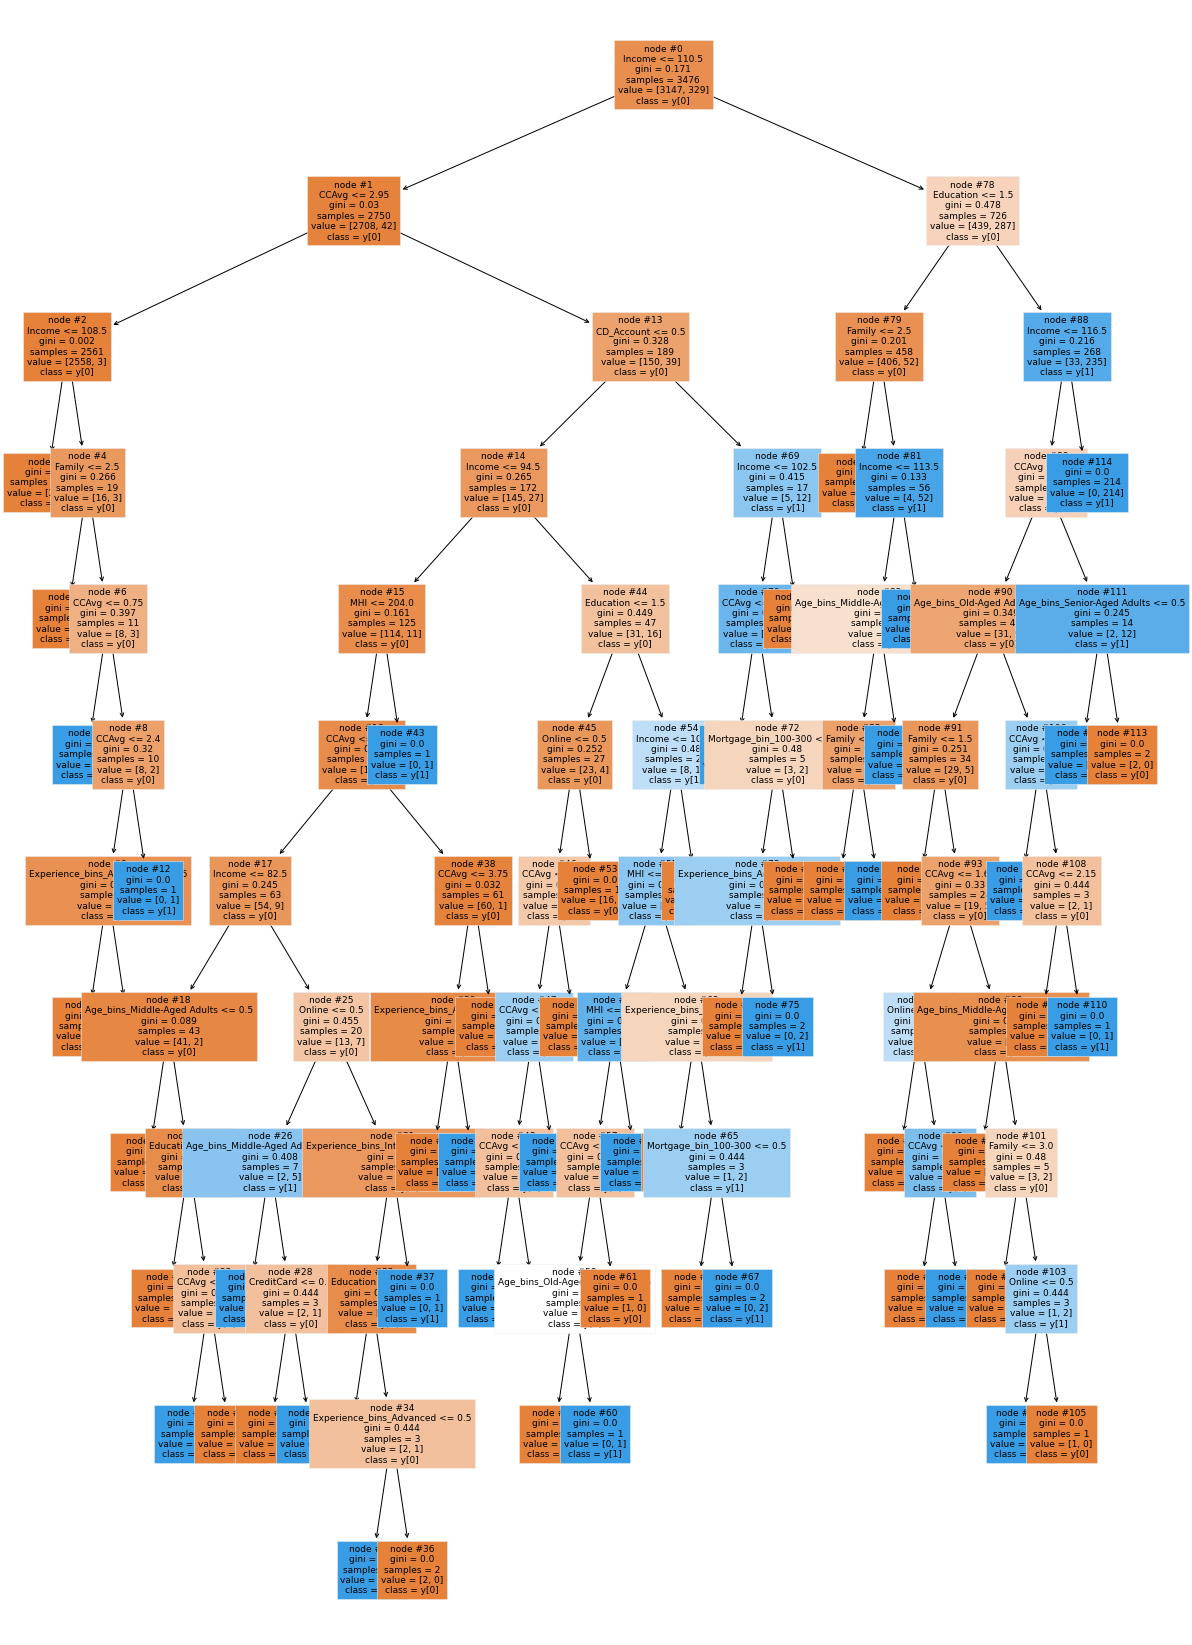

<IPython.core.display.Javascript object>

In [148]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [149]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 108.50
|   |   |   |--- weights: [2542.00, 0.00] class: 0
|   |   |--- Income >  108.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- CCAvg <= 0.75
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- CCAvg >  0.75
|   |   |   |   |   |--- CCAvg <= 2.40
|   |   |   |   |   |   |--- Experience_bins_Advanced <= 0.50
|   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |--- Experience_bins_Advanced >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- CCAvg >  2.40
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 94.50
|   |   |   |   |--- MHI <= 204.00
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Income <= 82.50
|   |

<IPython.core.display.Javascript object>

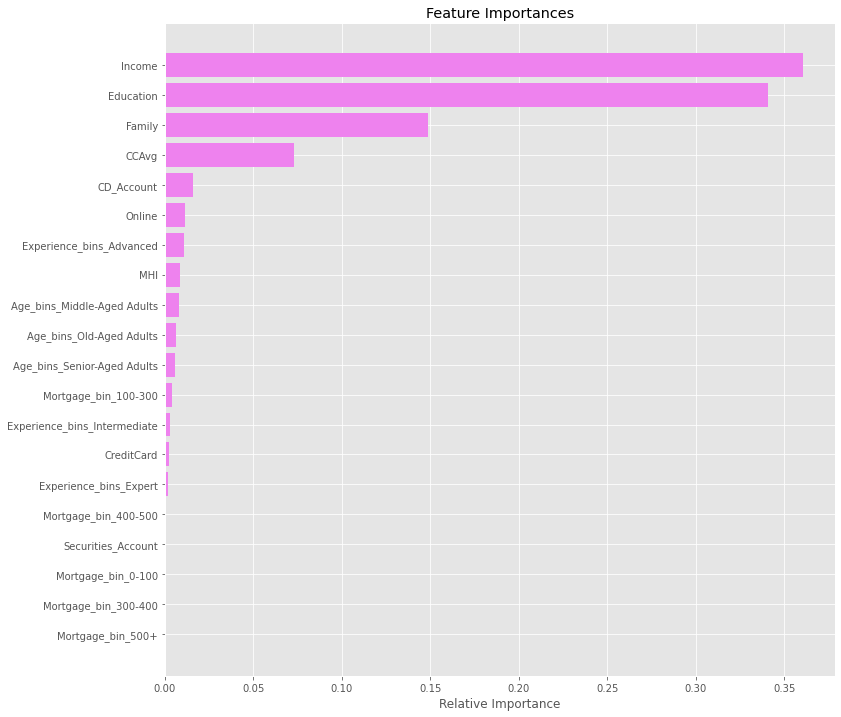

<IPython.core.display.Javascript object>

In [150]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* `Income`, `Education`, and `Family` are the top 3 important features.

### Using GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more.

In [151]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(min_impurity_decrease=1e-06, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

In [152]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

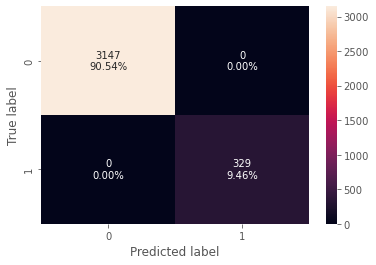

<IPython.core.display.Javascript object>

In [153]:
confusion_matrix_sklearn(estimator, X_train, y_train)

* The Recall stays the same on the training set as compared to the initial model.

#### Checking model performance on test set

In [154]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.97651,0.878378,0.884354,0.881356


<IPython.core.display.Javascript object>

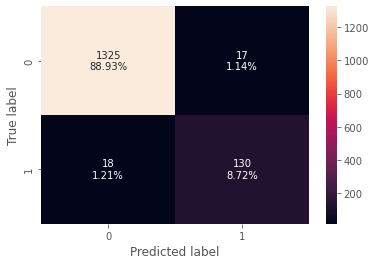

<IPython.core.display.Javascript object>

In [155]:
confusion_matrix_sklearn(estimator, X_test, y_test)

* After hyperparameter tuning the model performance has remained same and the model has become simpler.

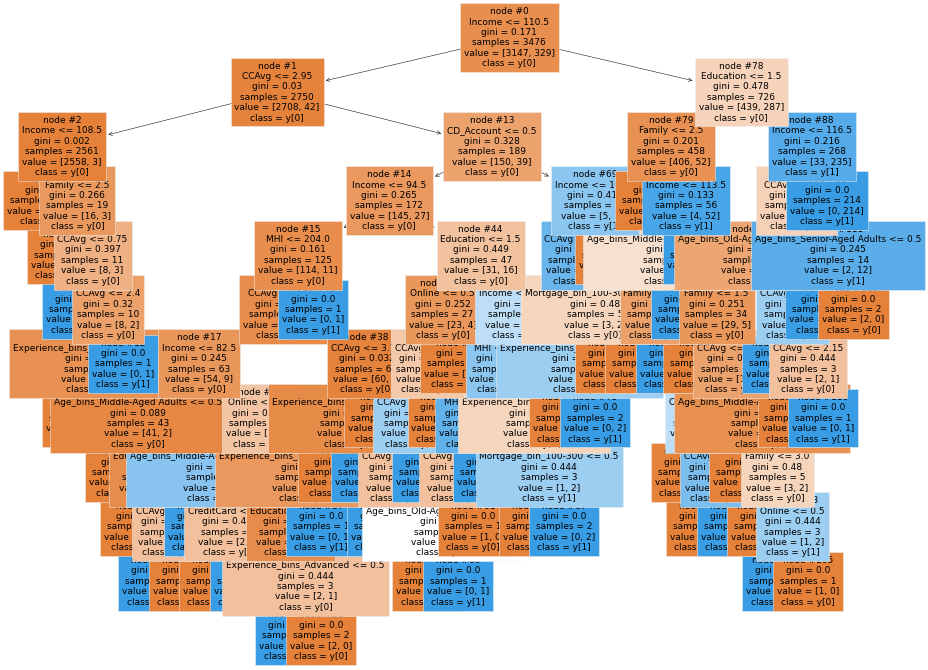

<IPython.core.display.Javascript object>

In [156]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* We are getting a simplified tree after pre-pruning.

## Cost Complexity Pruning

In [157]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [158]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000192,0.000384
2,0.000264,0.000911
3,0.000283,0.001477
4,0.000343,0.002507
5,0.000345,0.004231
6,0.000345,0.004921
7,0.000345,0.005612
8,0.000345,0.006302
9,0.000366,0.007399


<IPython.core.display.Javascript object>

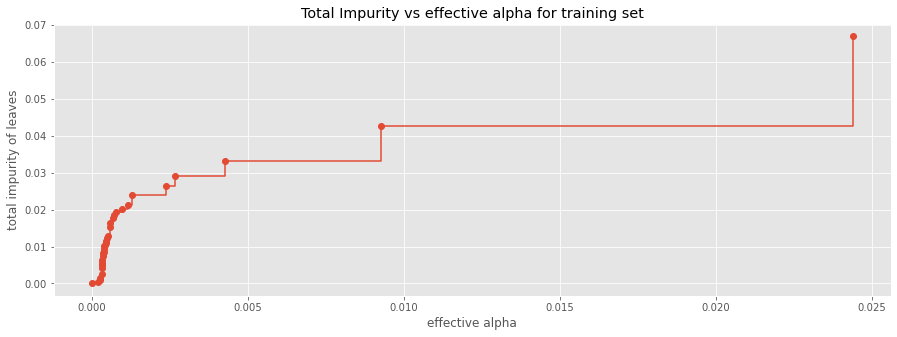

<IPython.core.display.Javascript object>

In [159]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [160]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0522063548098257


<IPython.core.display.Javascript object>


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

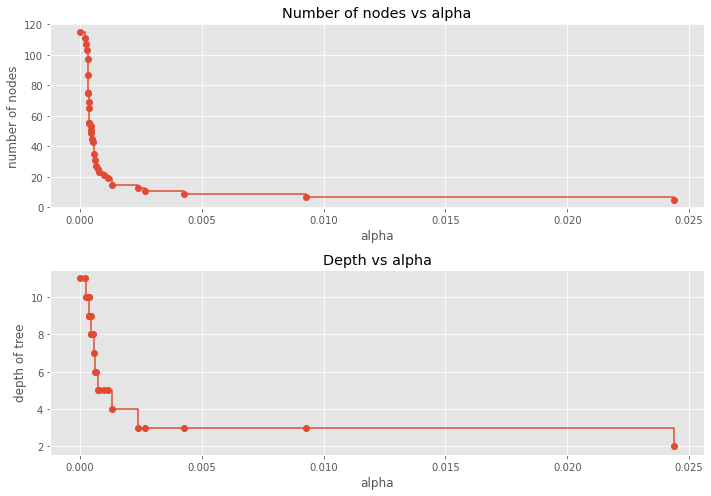

<IPython.core.display.Javascript object>

In [161]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets
----------------------------------------------------

In [162]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [163]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

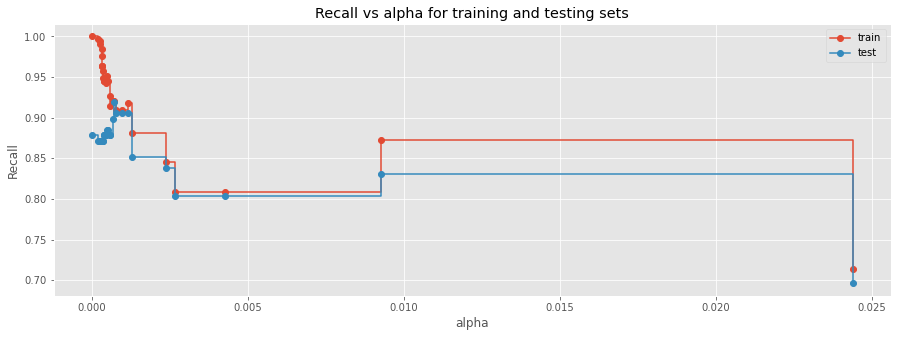

<IPython.core.display.Javascript object>

In [164]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [165]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0007310634265213565, random_state=1)


<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [166]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.988205,0.920973,0.95283,0.936631


<IPython.core.display.Javascript object>

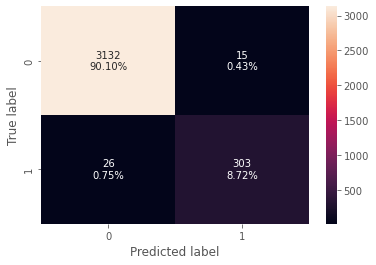

<IPython.core.display.Javascript object>

In [167]:
confusion_matrix_sklearn(best_model, X_train, y_train)

#### Checking model performance on test set

In [168]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.985235,0.918919,0.931507,0.92517


<IPython.core.display.Javascript object>

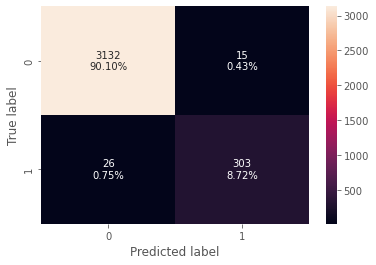

<IPython.core.display.Javascript object>

In [169]:
confusion_matrix_sklearn(best_model, X_train, y_train)

* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further.

## Visualizing the Decision Tree

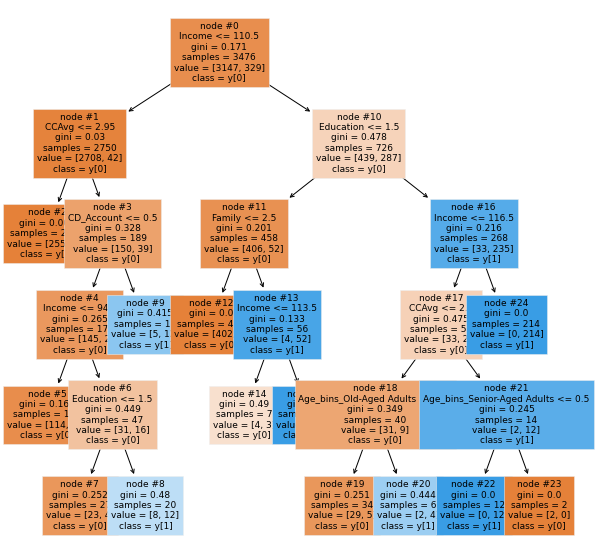

<IPython.core.display.Javascript object>

In [170]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [171]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2558.00, 3.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 94.50
|   |   |   |   |--- weights: [114.00, 11.00] class: 0
|   |   |   |--- Income >  94.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [23.00, 4.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- weights: [8.00, 12.00] class: 1
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [5.00, 12.00] class: 1
|--- Income >  110.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [402.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [4.00, 3.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 49.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.80
|   |   |   |   |--- Age_bins_Old-Aged Adul

<IPython.core.display.Javascript object>

In [172]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                   Imp
Income                        0.388428
Education                     0.379472
Family                        0.159460
CCAvg                         0.043471
CD_Account                    0.017538
Age_bins_Senior-Aged Adults   0.006450
Age_bins_Old-Aged Adults      0.005181
CreditCard                    0.000000
MHI                           0.000000
Age_bins_Middle-Aged Adults   0.000000
Online                        0.000000
Securities_Account            0.000000
Experience_bins_Intermediate  0.000000
Experience_bins_Advanced      0.000000
Experience_bins_Expert        0.000000
Mortgage_bin_0-100            0.000000
Mortgage_bin_100-300          0.000000
Mortgage_bin_300-400          0.000000
Mortgage_bin_400-500          0.000000
Mortgage_bin_500+             0.000000


<IPython.core.display.Javascript object>

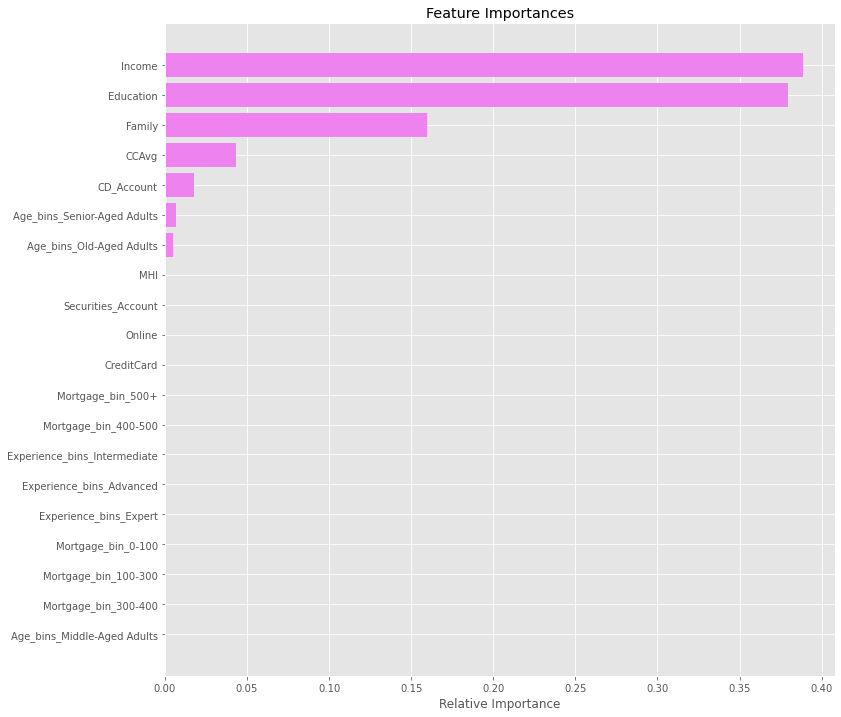

<IPython.core.display.Javascript object>

In [173]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* `Income`, `Education`, and `Family` remain the most important feature with post-pruning too.

## Comparing all the decision tree models

In [174]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,0.988205
Recall,1.0,1.0,0.920973
Precision,1.0,1.0,0.952830
F1,1.0,1.0,0.936631


<IPython.core.display.Javascript object>

In [175]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.976510,0.976510,0.985235
Recall,0.878378,0.878378,0.918919
Precision,0.884354,0.884354,0.931507
F1,0.881356,0.881356,0.925170


<IPython.core.display.Javascript object>

* Decision tree with post-pruning is giving the highest recall on the test set.
* The tree with post pruning is not complex and easy to interpret.

## Business Insights - Recommendations

* `Income`, `Education`, and `Family` (in that order) are the most important variables in determining if a `customer` can be offered a loan and convert him/her as an `asset customer`. 

* Criteria to approve loan according to `optimized` post-prunned decision tree model should depend on three main factors - `Income`, `Education`, and `Family`, and `CCAvg` that is - If the `Income` >  110.50 and `Family` has more than 2 members, then the customer will be able to apply for a loan and get converted to an `asset` customer.

* In most of the cases no borrower shall be given a loan if they have an `Income` less or equal to 110.5.

* Also no borower should be given a loan in most of the cases even if they have an `Income` greater or equal to 110.5 but `Education` level below 1.5.

* We were able to build a generalized model by optimizing the `F1 Score` using a `Post-Prunned Decision Tree` with a F1 score of 0.9251 which is much better than an optimized `Logistic Regression` Model which provided an `F1 score` of 0.7167. This high difference between the two `optimized` models may be due to the presence of non-linearilties that the `Logistic Regression` model is not able to deal with.